In [16]:
##-----------------------------------------------------------------------------------------##
##-----------------------------------------------------------------------------------------##
##--function approximation for f(x,y)=cos(x+6*0.35y)+2*0.35xy, where x,y belong to [-1,1]--##
##-----------------------------------------------------------------------------------------##
##-----------------------------------------------------------------------------------------##

## Reference: Jin Yu, "Artificial Neural Network: Assignment" Katholieke Universiteit Leuven, 
## Specialized advanced studies Master in Artificial Intelligence.
## http://users.cecs.anu.edu.au/~jinyu/JinYu_files/preproj/ANN.pdf
## (accessed Feb. 5, 2022).


In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
import pandas as pd
from tensorflow import keras
from keras.layers import concatenate
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import numpy as np
from random import random
import matplotlib.pyplot as plt
from scipy import interpolate
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import time
from keras.losses import mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping
from keras.callbacks import Callback as cb

In [2]:
## function definition
def f(x,y):
    return np.cos(x+6*0.35*y)+2*0.35*x*y 

In [3]:
x_train = np.random.uniform(-1.0,1.0,100)
y_train = np.random.uniform(-1.0,1.0,100)
x_test = np.random.uniform(-1.0,1.0,81)
y_test = np.random.uniform(-1.0,1.0,81)
x_pred = np.random.uniform(-1.0,1.0,81)
y_pred = np.random.uniform(-1.0,1.0,81)

In [4]:
z_train = f(x_train,y_train)
z_test = f(x_test,y_test)
z_pred = f(x_pred,y_pred)

In [5]:
## merged data for one input in the neural networks
merged_input = np.stack([x_train, y_train], axis=1)
merged_test = np.stack([x_test, y_test], axis=1)
merged_pred = np.stack([x_pred, y_pred], axis=1)

In [6]:
## training models with stochastic gradient descent, and learning rate of 0.02

In [7]:
print(x_train.shape)
print(y_train.shape)
print(z_train.shape)
print(x_test.shape)
print(y_test.shape)
print(z_test.shape)

(100,)
(100,)
(100,)
(81,)
(81,)
(81,)


In [10]:
## using hyperbolic tangent activation for 2 neurons 2-layer neural networks
model2 = keras.Sequential()
model2.add(layers.Dense(2, activation="tanh", input_shape=(2,))) #hidden layer1
model2.add(layers.Dense(2, activation="tanh"))#hidden layer2
model2.add(layers.Dense(1,activation="tanh"))#output layer
model2.summary()

## using hyperbolic tangent activation for 8 neurons 2-layer neural networks
model8 = keras.Sequential()
model8.add(layers.Dense(8, activation="tanh", input_shape=(2,))) #hidden layer1
model8.add(layers.Dense(8, activation="tanh"))#hidden layer2
model8.add(layers.Dense(1,activation="tanh"))#output layer
model8.summary()

## using hyperbolic tangent activation for 50 neurons 2-layer neural networks
model50 = keras.Sequential()
model50.add(layers.Dense(50, activation="tanh", input_shape=(2,))) #hidden layer1
model50.add(layers.Dense(50, activation="tanh"))#hidden layer2
model50.add(layers.Dense(1,activation="tanh"))#output layer
model50.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 24        
                                                                 
 dense_4 (Dense)             (None, 8)

In [11]:

## using keras SGD optimizer and Mean Squared Error Loss

In [12]:
optimizer = keras.optimizers.SGD(learning_rate=0.02)

In [13]:
model2.compile(optimizer=optimizer, loss='MSE')
model8.compile(optimizer=optimizer, loss='MSE')
model50.compile(optimizer=optimizer, loss='MSE')

In [14]:
## each models train for 100 epochs with batch size of 1

In [15]:
history2= model2.fit(merged_input,z_train,epochs=100,validation_data=(merged_test,z_test),batch_size=1)
history8= model8.fit(merged_input,z_train,epochs=100,validation_data=(merged_test,z_test),batch_size=1)
history50= model50.fit(merged_input,z_train,epochs=100,validation_data=(merged_test,z_test),batch_size=1)

Epoch 1/100
100/100 [==============================] - 1s 2ms/step - loss: 0.2050 - val_loss: 0.2089
Epoch 2/100
100/100 [==============================] - 0s 1ms/step - loss: 0.1914 - val_loss: 0.2102
Epoch 3/100
100/100 [==============================] - 0s 1ms/step - loss: 0.1922 - val_loss: 0.2096
Epoch 4/100
100/100 [==============================] - 0s 1ms/step - loss: 0.1883 - val_loss: 0.2054
Epoch 5/100
100/100 [==============================] - 0s 1ms/step - loss: 0.1806 - val_loss: 0.2058
Epoch 6/100
100/100 [==============================] - 0s 1ms/step - loss: 0.1720 - val_loss: 0.1824
Epoch 7/100
100/100 [==============================] - 0s 1ms/step - loss: 0.1625 - val_loss: 0.1671
Epoch 8/100
100/100 [==============================] - 0s 1ms/step - loss: 0.1462 - val_loss: 0.1420
Epoch 9/100
100/100 [==============================] - 0s 1000us/step - loss: 0.1269 - val_loss: 0.1280
Epoch 10/100
100/100 [==============================] - 0s 1ms/step - loss: 0.1069 - val

100/100 [==============================] - 0s 1ms/step - loss: 0.0056 - val_loss: 0.0064
Epoch 82/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0056 - val_loss: 0.0060
Epoch 83/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0057 - val_loss: 0.0059
Epoch 84/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0055 - val_loss: 0.0062
Epoch 85/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0057 - val_loss: 0.0058
Epoch 86/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0057 - val_loss: 0.0058
Epoch 87/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0055 - val_loss: 0.0059
Epoch 88/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0056 - val_loss: 0.0068
Epoch 89/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0058 - val_loss: 0.0058
Epoch 90/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0057 - val_loss: 

100/100 [==============================] - 0s 1ms/step - loss: 0.0042 - val_loss: 0.0057
Epoch 62/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0044 - val_loss: 0.0052
Epoch 63/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0043 - val_loss: 0.0056
Epoch 64/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0043 - val_loss: 0.0054
Epoch 65/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0042 - val_loss: 0.0052
Epoch 66/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0038 - val_loss: 0.0049
Epoch 67/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0042 - val_loss: 0.0050
Epoch 68/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0039 - val_loss: 0.0051
Epoch 69/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0038 - val_loss: 0.0051
Epoch 70/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0041 - val_loss: 

100/100 [==============================] - 0s 1ms/step - loss: 0.0088 - val_loss: 0.0105
Epoch 42/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0086 - val_loss: 0.0088
Epoch 43/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0084 - val_loss: 0.0092
Epoch 44/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0084 - val_loss: 0.0099
Epoch 45/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0080 - val_loss: 0.0095
Epoch 46/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0079 - val_loss: 0.0086
Epoch 47/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0076 - val_loss: 0.0098
Epoch 48/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0082 - val_loss: 0.0092
Epoch 49/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0079 - val_loss: 0.0103
Epoch 50/100
100/100 [==============================] - 0s 991us/step - loss: 0.0085 - val_loss

xi = np.linspace(min(x_test), max(x_test), 10)
yi = np.linspace(min(y_test), max(y_test), 10)
zi = interpolate.griddata(x_test, y_test, z_test, xi, yi, method='linear')
plt.contour(xi, yi, zi)

In [ ]:
## the original function contour graph using the pyplot

Text(0.5, 1.0, 'Function Contour - Target')

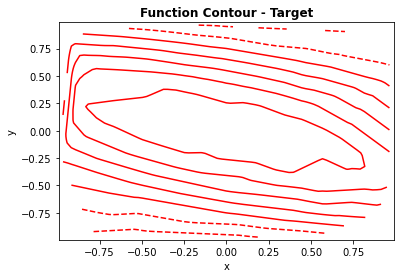

In [17]:
grid_x, grid_y = np.mgrid[min(x_pred):max(x_pred):81j, min(y_pred):max(y_pred):81j]
fig, ax = plt.subplots()
Z = interpolate.griddata((x_pred,y_pred), f(x_pred,y_pred), (grid_x, grid_y), method='linear')
contour = ax.contour(grid_x, grid_y, Z,colors='r')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Function Contour - Target', 
             fontweight ="bold") 

In [18]:
## using three different models to approximate the same input as the original function
z_predicted2 = model2.predict(merged_pred)
z_predicted8 = model8.predict(merged_pred)
z_predicted50 = model50.predict(merged_pred)

In [19]:
z_predicted2 = z_predicted2.flatten()
z_predicted8 = z_predicted8.flatten()
z_predicted50 = z_predicted50.flatten()

Text(0.5, 1.0, 'Function Contour - 2 Neurons Network')

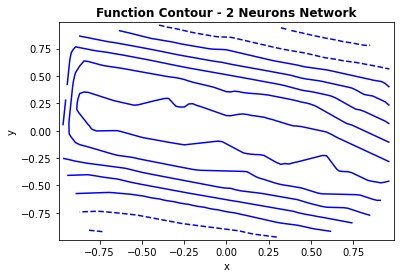

In [20]:
## function approximation contour plot of the model2 - with 2 neurons

grid_x, grid_y = np.mgrid[min(x_pred):max(x_pred):81j, min(y_pred):max(y_pred):81j]
fig2, ax2 = plt.subplots()
Z2 = interpolate.griddata((x_pred,y_pred), z_predicted2, (grid_x, grid_y), method='linear')
contour2 = ax2.contour(grid_x, grid_y, Z2,colors='b')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Function Contour - 2 Neurons Network', 
             fontweight ="bold") 

Text(0.5, 1.0, 'Function Contour - 8 Neurons Network')

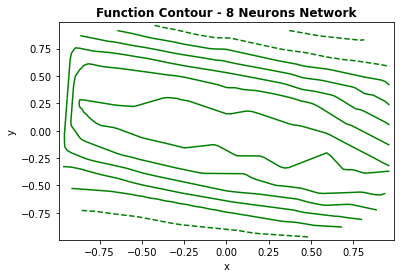

In [21]:
## function approximation contour plot of the model8 - with 8 neurons

fig8, ax8 = plt.subplots()
points = np.array((x_pred,y_pred)).T
Z8 = interpolate.griddata(points, z_predicted8, (grid_x, grid_y), method='linear')
contour8 = ax8.contour(grid_x, grid_y, Z8,colors='g')
ax8.set_xlabel('x')
ax8.set_ylabel('y')
ax8.set_title('Function Contour - 8 Neurons Network', 
             fontweight ="bold") 

Text(0.5, 1.0, 'Function Contour - 50 Neurons Network')

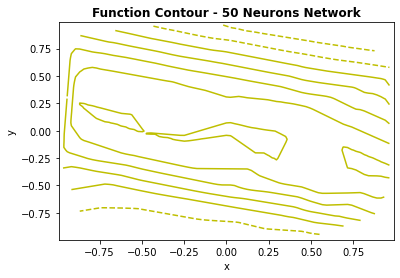

In [22]:
## function approximation contour plot of the model8 - with 50 neurons

fig50, ax50 = plt.subplots()

Z50 = interpolate.griddata((x_pred,y_pred), z_predicted50, (grid_x, grid_y), method='linear')

contour = ax50.contour(grid_x, grid_y, Z50,colors='y')
ax50.set_xlabel('x')
ax50.set_ylabel('y')
ax50.set_title('Function Contour - 50 Neurons Network', 
             fontweight ="bold") 

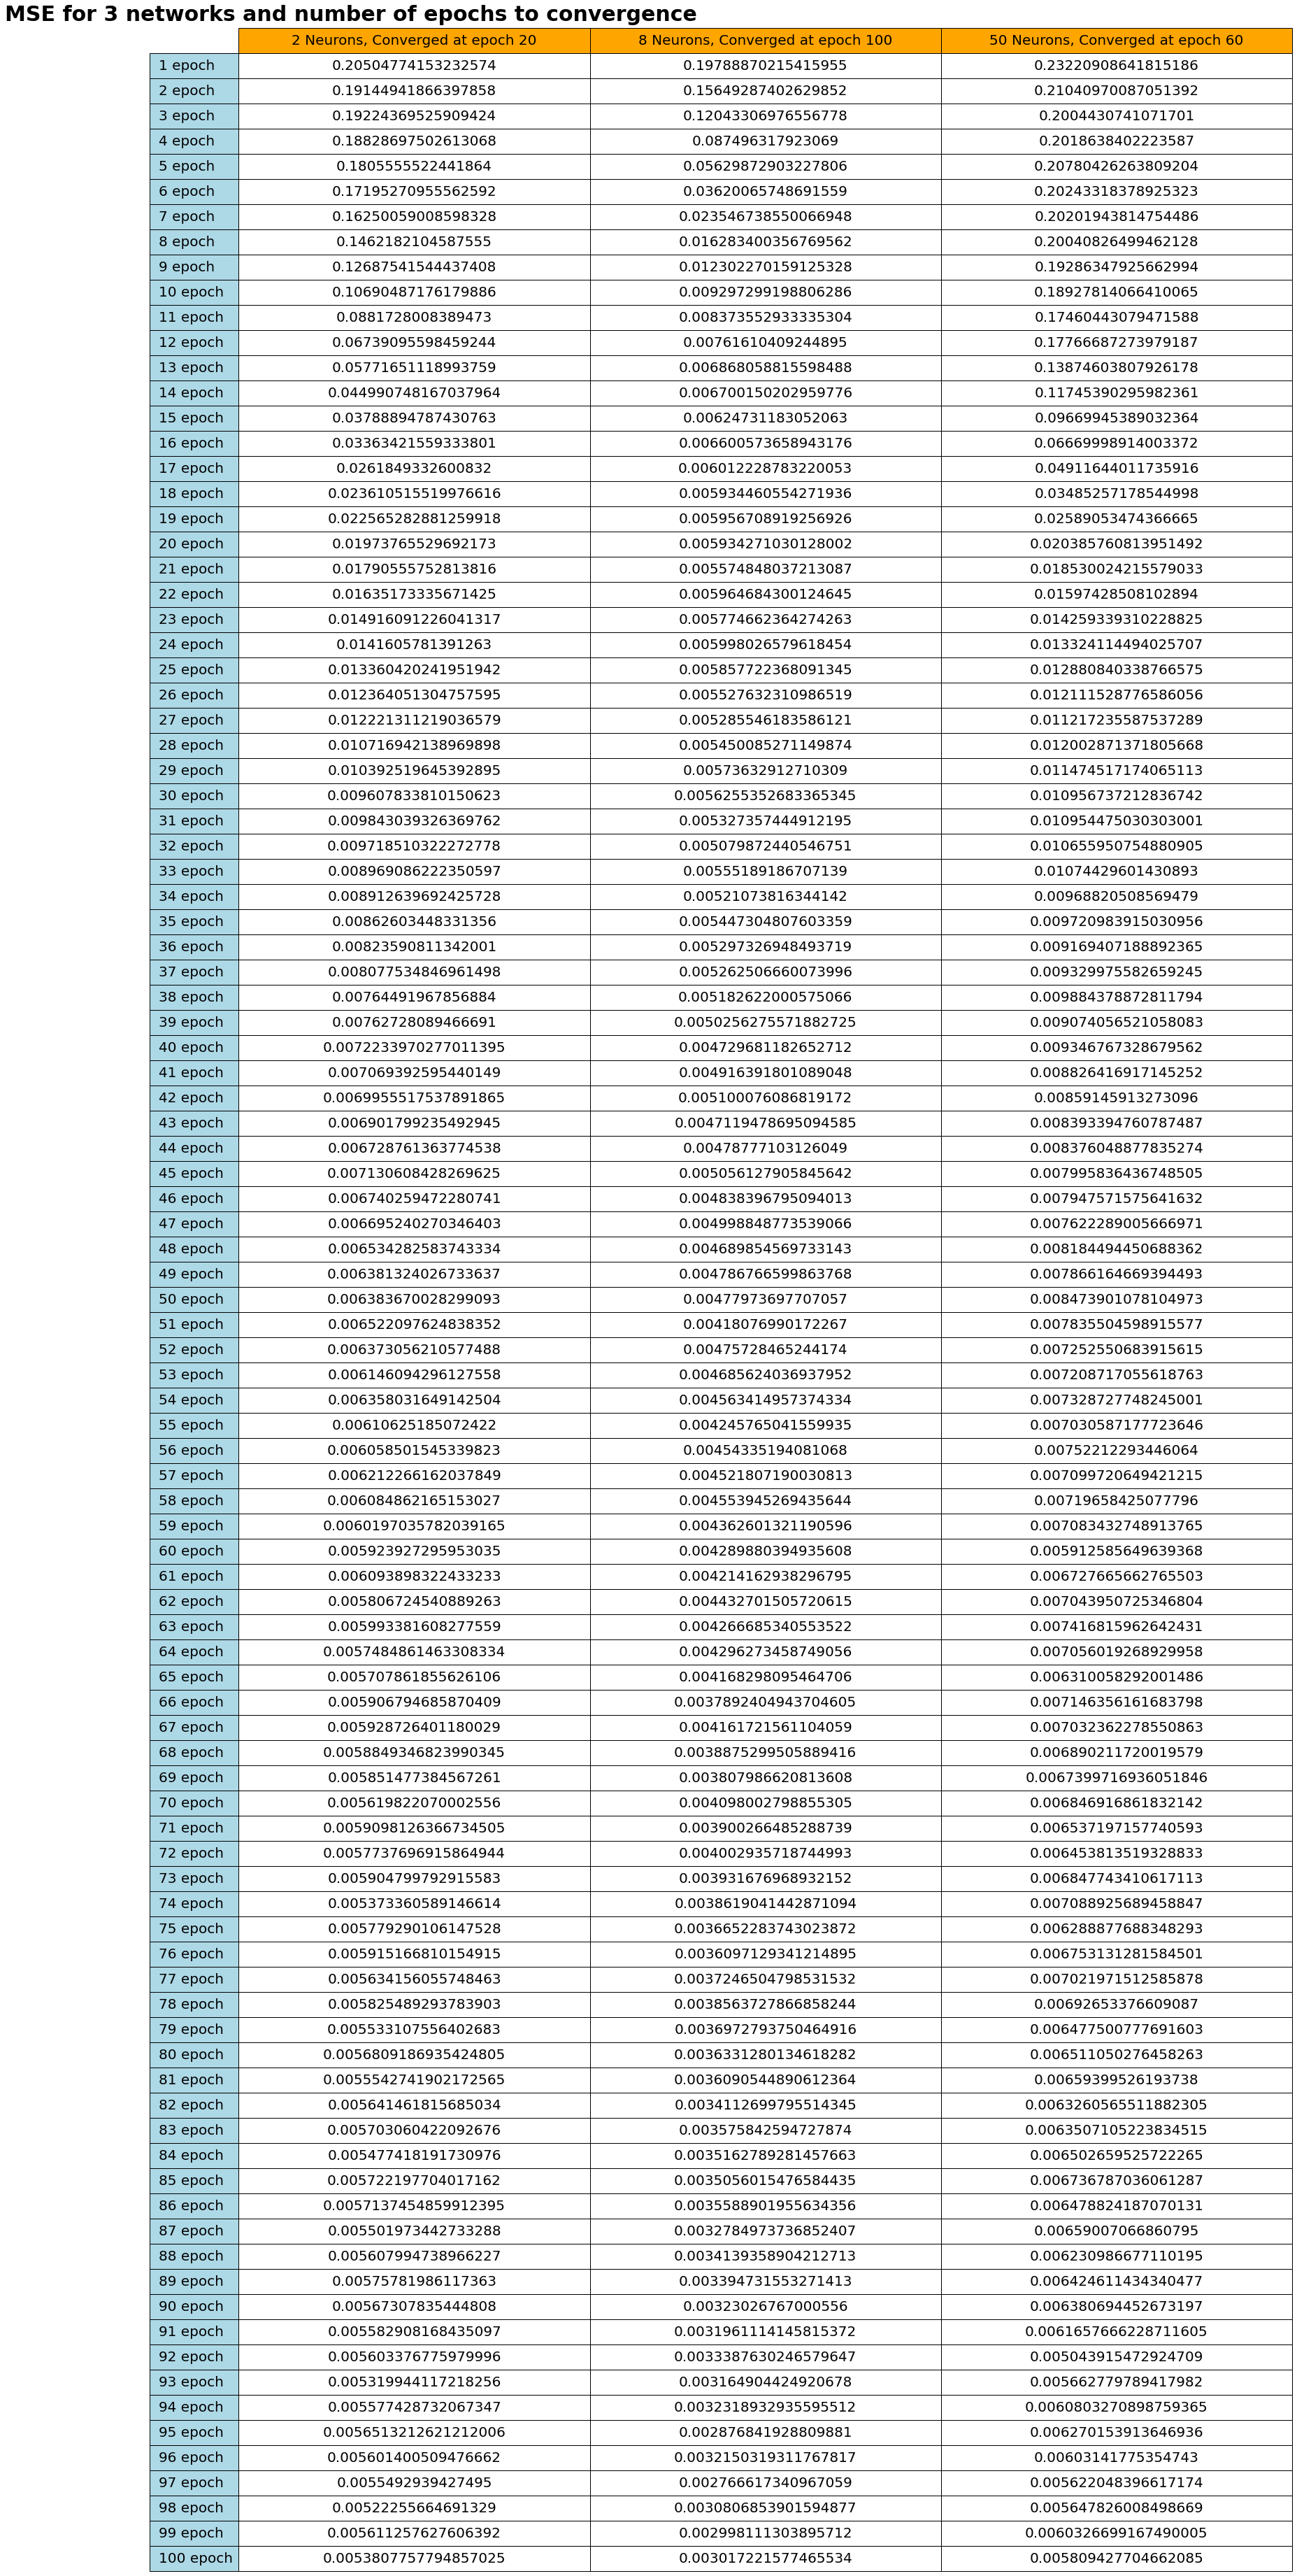

In [24]:
## summary of MSE for three different models on each epoch

col_lables = ['2 Neurons, Converged at epoch 20', '8 Neurons, Converged at epoch 100', '50 Neurons, Converged at epoch 60']
row_lables = ["{:d} epoch".format(i+1) for i in range(100)]


data = [history2.history['loss'],history8.history['loss'],history50.history['loss']]

MSE_loss = np.array(data).T
#print(MSE_loss.shape)


fig_table, ax_table = plt.subplots() 
ax_table.set_axis_off() 
table = ax_table.table( 
    cellText = MSE_loss,  
    rowLabels = row_lables,  
    colLabels = col_lables, 
    rowColours =["lightblue"] * 100,  
    colColours =["orange"] * 3, 
    colWidths = [0.5]*3,
    cellLoc ='center',  
    loc ='upper left')     

table.auto_set_font_size(False)
table.set_fontsize(20)
table.scale(3, 3)
   
ax_table.set_title('MSE for 3 networks and number of epochs to convergence', 
             fontweight ="bold",fontsize=30) 
   
plt.show() 
  

In [244]:
## regenerate 10 by 10 randome training samples to explore the optimizers

In [26]:
x_train_b = np.random.uniform(-1.0,1.0,100)
y_train_b = np.random.uniform(-1.0,1.0,100)
z_train_b = f(x_train_b,y_train_b)
merged_input_b = np.stack([x_train_b, y_train_b], axis=1)

In [27]:
## using hyperbolic tangent activation for 8 neurons 2-layer neural networks with GradientDescentOptimizer
model_traingd = keras.Sequential()
model_traingd.add(layers.Dense(8, activation="tanh", input_shape=(2,))) #hidden layer1
model_traingd.add(layers.Dense(8, activation="tanh"))#hidden layer2
model_traingd.add(layers.Dense(1,activation="tanh"))#output layer
model_traingd.summary()

## using hyperbolic tangent activation for 8 neurons 2-layer neural networks with MomentumOptimizer
model_traingdm = keras.Sequential()
model_traingdm.add(layers.Dense(8, activation="tanh", input_shape=(2,))) #hidden layer1
model_traingdm.add(layers.Dense(8, activation="tanh"))#hidden layer2
model_traingdm.add(layers.Dense(1,activation="tanh"))#output layer
model_traingdm.summary()

## using hyperbolic tangent activation for 8 neurons 2-layer neural networks with RMSPropOptimizer
model_traingrms = keras.Sequential()
model_traingrms.add(layers.Dense(8, activation="tanh", input_shape=(2,))) #hidden layer1
model_traingrms.add(layers.Dense(8, activation="tanh"))#hidden layer2
model_traingrms.add(layers.Dense(1,activation="tanh"))#output layer
model_traingrms.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 8)                 24        
                                                                 
 dense_10 (Dense)            (None, 8)                 72        
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 105
Trainable params: 105
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 8)                 24        
                                                                 
 dense_13 (Dense)            (None

In [28]:
## three different optimizers, 
## SGD with learning rate of 0.02, 
## SGD with 0.9 momentum, 
## RMSprop with learning rate of 0.02

traingd = keras.optimizers.SGD(learning_rate=0.02, momentum=0.0)
traingdm = keras.optimizers.SGD(learning_rate=0.02, momentum=0.9)
traingrms = keras.optimizers.RMSprop(learning_rate=0.02)

In [29]:
model_traingd.compile(optimizer=traingd, loss='MSE')
model_traingdm.compile(optimizer=traingdm, loss='MSE')
model_traingrms.compile(optimizer=traingrms, loss='MSE')

In [30]:
##record epoch time

class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

In [31]:
## record training time in callbacks

time_traingd = TimeHistory()
time_traingdm = TimeHistory()
time_traingrms = TimeHistory()
history_traingd= model_traingd.fit(merged_input_b,z_train_b,epochs=100,batch_size=1,callbacks=time_traingd)
history_traingdm= model_traingdm.fit(merged_input_b,z_train_b,epochs=100,batch_size=1,callbacks=time_traingdm)
history_traingrms= model_traingrms.fit(merged_input_b,z_train_b,epochs=100,batch_size=1,callbacks=time_traingrms)


Epoch 1/100
100/100 [==============================] - 0s 1ms/step - loss: 0.2592
Epoch 2/100
100/100 [==============================] - 0s 837us/step - loss: 0.2282
Epoch 3/100
100/100 [==============================] - 0s 730us/step - loss: 0.2179
Epoch 4/100
100/100 [==============================] - 0s 752us/step - loss: 0.2180
Epoch 5/100
100/100 [==============================] - 0s 639us/step - loss: 0.2093
Epoch 6/100
100/100 [==============================] - 0s 898us/step - loss: 0.2041
Epoch 7/100
100/100 [==============================] - 0s 882us/step - loss: 0.1868
Epoch 8/100
100/100 [==============================] - 0s 863us/step - loss: 0.1783
Epoch 9/100
100/100 [==============================] - 0s 717us/step - loss: 0.1513
Epoch 10/100
100/100 [==============================] - 0s 765us/step - loss: 0.1261
Epoch 11/100
100/100 [==============================] - 0s 715us/step - loss: 0.0951
Epoch 12/100
100/100 [==============================] - 0s 734us/step - loss

100/100 [==============================] - 0s 732us/step - loss: 0.0026
Epoch 98/100
100/100 [==============================] - 0s 663us/step - loss: 0.0026
Epoch 99/100
100/100 [==============================] - 0s 687us/step - loss: 0.0026
Epoch 100/100
100/100 [==============================] - 0s 675us/step - loss: 0.0025
Epoch 1/100
100/100 [==============================] - 0s 840us/step - loss: 0.2331
Epoch 2/100
100/100 [==============================] - 0s 688us/step - loss: 0.2509
Epoch 3/100
100/100 [==============================] - 0s 707us/step - loss: 0.2281
Epoch 4/100
100/100 [==============================] - 0s 616us/step - loss: 0.1571
Epoch 5/100
100/100 [==============================] - 0s 725us/step - loss: 0.0202
Epoch 6/100
100/100 [==============================] - 0s 706us/step - loss: 0.0166
Epoch 7/100
100/100 [==============================] - 0s 689us/step - loss: 0.0150
Epoch 8/100
100/100 [==============================] - 0s 670us/step - loss: 0.0153


100/100 [==============================] - 0s 695us/step - loss: 0.0042
Epoch 94/100
100/100 [==============================] - 0s 765us/step - loss: 0.0056
Epoch 95/100
100/100 [==============================] - 0s 756us/step - loss: 0.0032
Epoch 96/100
100/100 [==============================] - 0s 667us/step - loss: 0.0058
Epoch 97/100
100/100 [==============================] - 0s 913us/step - loss: 0.0029
Epoch 98/100
100/100 [==============================] - 0s 661us/step - loss: 0.0030
Epoch 99/100
100/100 [==============================] - 0s 684us/step - loss: 0.0048
Epoch 100/100
100/100 [==============================] - 0s 701us/step - loss: 0.0074
Epoch 1/100
100/100 [==============================] - 0s 736us/step - loss: 0.2681
Epoch 2/100
100/100 [==============================] - 0s 717us/step - loss: 0.2246
Epoch 3/100
100/100 [==============================] - 0s 814us/step - loss: 0.1192
Epoch 4/100
100/100 [==============================] - 0s 709us/step - loss: 0.0

100/100 [==============================] - 0s 776us/step - loss: 0.0140
Epoch 90/100
100/100 [==============================] - 0s 760us/step - loss: 0.0134
Epoch 91/100
100/100 [==============================] - 0s 727us/step - loss: 0.0161
Epoch 92/100
100/100 [==============================] - 0s 818us/step - loss: 0.0142
Epoch 93/100
100/100 [==============================] - 0s 809us/step - loss: 0.0154
Epoch 94/100
100/100 [==============================] - 0s 759us/step - loss: 0.0131
Epoch 95/100
100/100 [==============================] - 0s 824us/step - loss: 0.0154
Epoch 96/100
100/100 [==============================] - 0s 672us/step - loss: 0.0141
Epoch 97/100
100/100 [==============================] - 0s 683us/step - loss: 0.0118
Epoch 98/100
100/100 [==============================] - 0s 827us/step - loss: 0.0150
Epoch 99/100
100/100 [==============================] - 0s 811us/step - loss: 0.0149
Epoch 100/100
100/100 [==============================] - 0s 741us/step - loss:

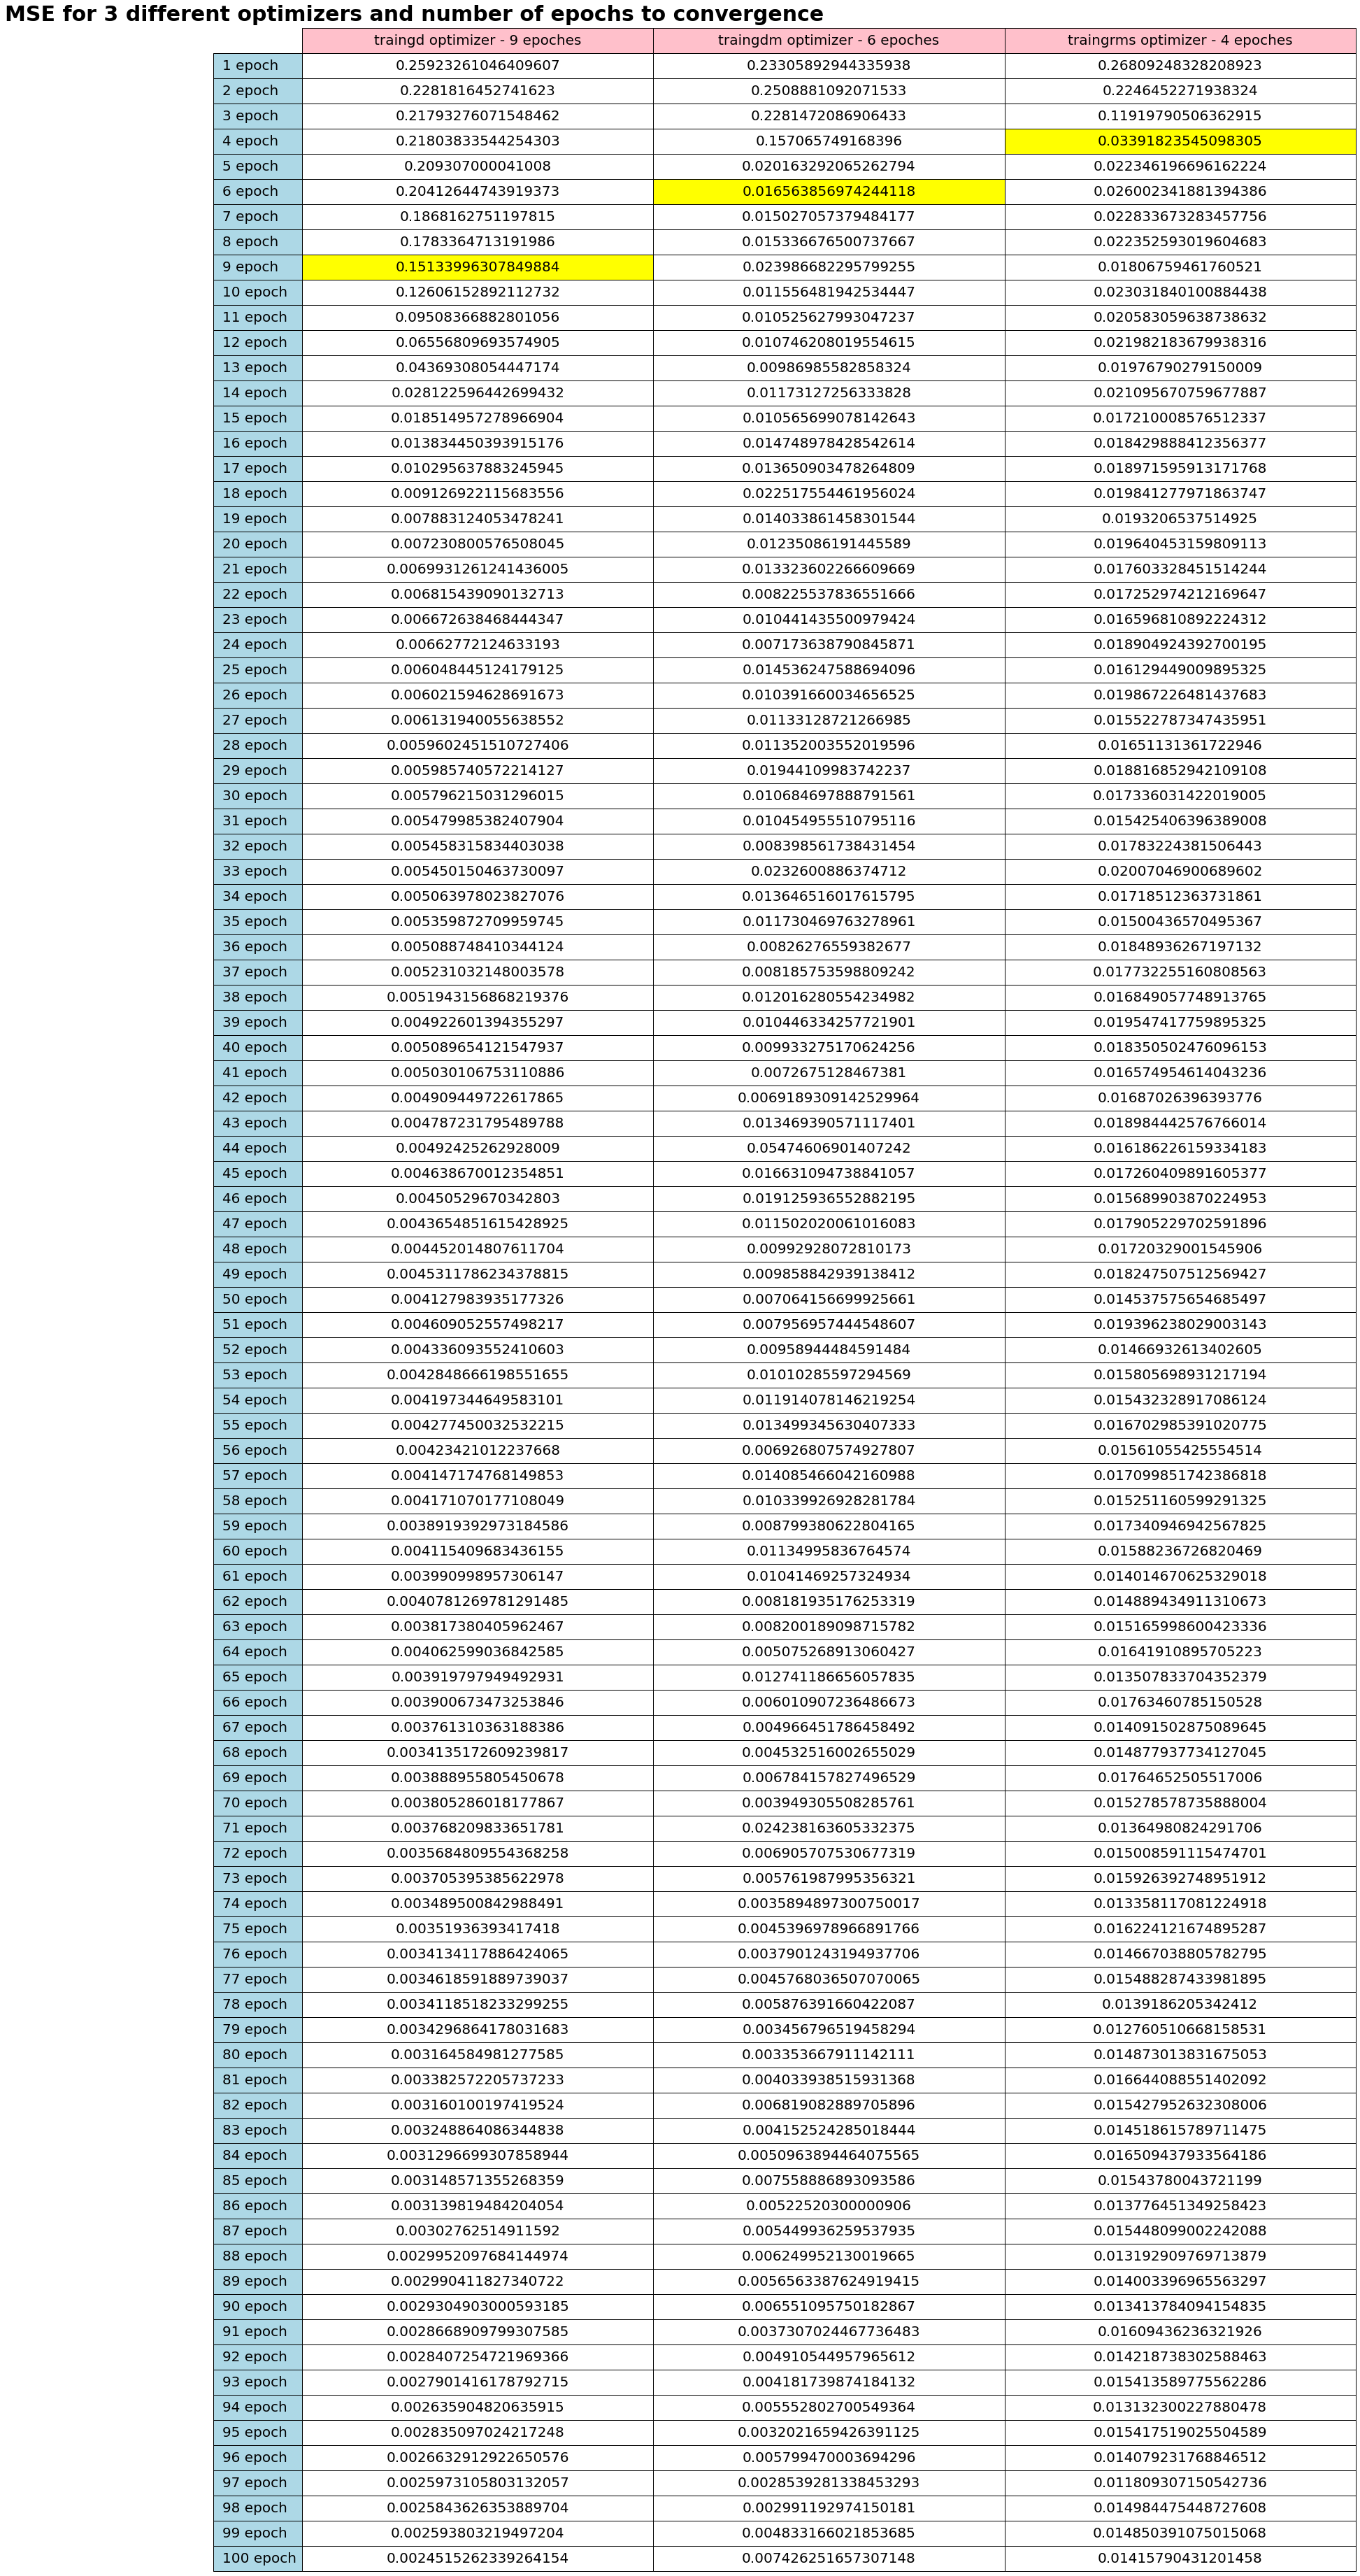

In [32]:
col_lables_b = ['traingd optimizer - 9 epoches', 'traingdm optimizer - 6 epoches', 'traingrms optimizer - 4 epoches']
row_lables_b = ["{:d} epoch".format(i+1) for i in range(100)]


data = [history_traingd.history['loss'],history_traingdm.history['loss'] , history_traingrms.history['loss']]

MSE_loss = np.array(data).T

fig_optimizer, ax_optimizer = plt.subplots() 
ax_optimizer.set_axis_off() 
table_optimizer = ax_optimizer.table( 
    cellText = MSE_loss,  
    rowLabels = row_lables_b,  
    colLabels = col_lables_b, 
    rowColours =["lightblue"] * 100,  
    colColours =["pink"] * 3, 
    colWidths = [0.5]*3,
    cellLoc ='center',  
    loc ='upper left')  

table_optimizer[(9, 0)].set_facecolor("yellow")
table_optimizer[(6, 1)].set_facecolor("yellow")
table_optimizer[(4, 2)].set_facecolor("yellow")

table_optimizer.auto_set_font_size(False)
table_optimizer.set_fontsize(20)
table_optimizer.scale(3, 3)
   
ax_optimizer.set_title('MSE for 3 different optimizers and number of epochs to convergence', 
             fontweight ="bold",fontsize=30) 
   
plt.show() 


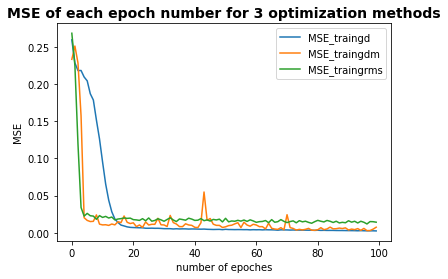

In [33]:
MSE_traingd = history_traingd.history['loss']
MSE_traingdm = history_traingdm.history['loss']
MSE_traingrms = history_traingrms.history['loss']
  
# plot lines
plt.plot(MSE_traingd, label = "MSE_traingd")
plt.plot(MSE_traingdm, label = "MSE_traingdm")
plt.plot(MSE_traingrms, label = "MSE_traingrms")

plt.xlabel('number of epoches')
plt.ylabel('MSE')
plt.title('MSE of each epoch number for 3 optimization methods',fontweight ="bold",fontsize=14)
plt.legend()
plt.show()

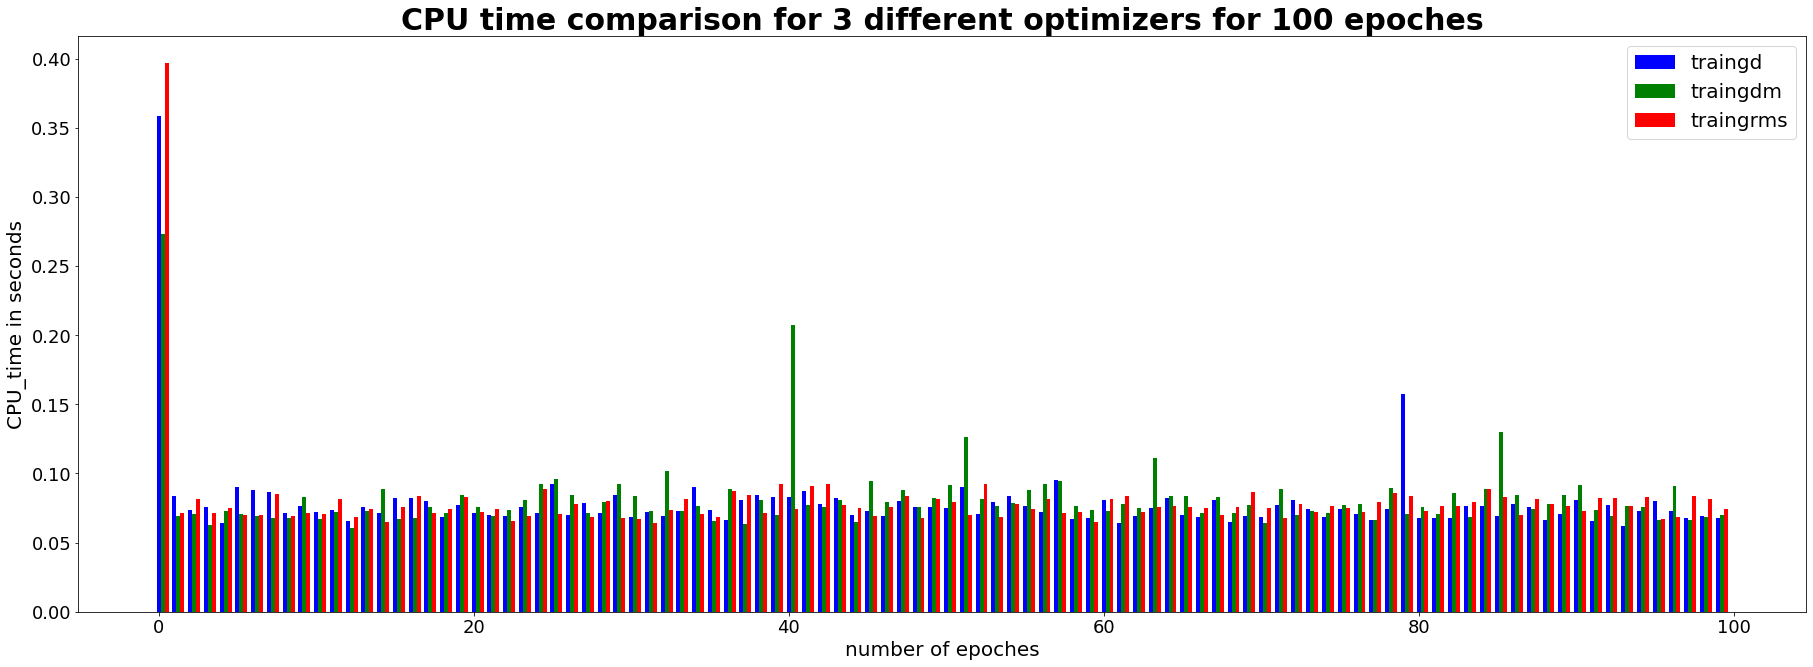

In [34]:
##cpu time over 100 epoches
cpu_time_100 = [time_traingd.times,
time_traingdm.times,
time_traingrms.times]
##take average over 100 epoches
#cpu_time_avg = [np.average(time_traingd.times),np.average(time_traingdm.times),np.average(time_traingrms.times)]
X = np.arange(100)
fig_cpu = plt.figure()

ax_cpu = fig_cpu.add_axes([0,0,4,2])
ax_cpu.bar(X + 0.00, cpu_time_100[0], color = 'b', width = 0.25,label='traingd')
ax_cpu.bar(X + 0.25, cpu_time_100[1], color = 'g', width = 0.25,label='traingdm')
ax_cpu.bar(X + 0.50, cpu_time_100[2], color = 'r', width = 0.25,label='traingrms')
ax_cpu.set_title('CPU time comparison for 3 different optimizers for 100 epoches', 
             fontweight ="bold",fontsize=30) 
ax_cpu.set_xlabel('number of epoches',fontsize=20)
ax_cpu.set_ylabel('CPU_time in seconds',fontsize=20)
ax_cpu.legend(fontsize=20)
ax_cpu.tick_params(axis="y", labelsize=18)
ax_cpu.tick_params(axis="x", labelsize=18)

In [35]:
#using root mean square as accuracy measurement
accuracy_traingd = 1-np.sqrt(history_traingd.history['loss'])
accuracy_traingdm = 1-np.sqrt(history_traingdm.history['loss'])
accuracy_traingrms =1-np.sqrt(history_traingrms.history['loss'])
#print(accuracy_traingd[8])
#print(accuracy_traingdm[5])
#print(accuracy_traingrms[3])

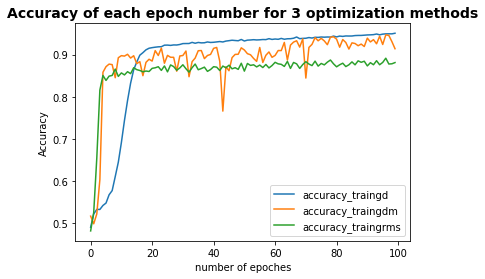

In [36]:
plt.plot(accuracy_traingd, label = "accuracy_traingd")
plt.plot(accuracy_traingdm, label = "accuracy_traingdm")
plt.plot(accuracy_traingrms, label = "accuracy_traingrms")

plt.xlabel('number of epoches')
plt.ylabel('Accuracy')
plt.title('Accuracy of each epoch number for 3 optimization methods',fontweight ="bold",fontsize=14)
plt.legend()
plt.show()

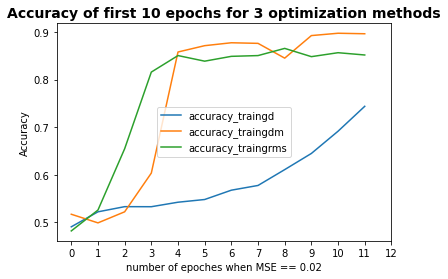

In [37]:
plt.plot(accuracy_traingd[:12], label = "accuracy_traingd")
plt.plot(accuracy_traingdm[:12], label = "accuracy_traingdm")
plt.plot(accuracy_traingrms[:12], label = "accuracy_traingrms")

plt.xlabel('number of epoches when MSE == 0.02')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,13))
plt.title('Accuracy of first 10 epochs for 3 optimization methods',fontweight ="bold",fontsize=14)
plt.legend()
plt.show()

In [38]:
## regenerate 10 by 10 randome training samples 
## to explore MSE convergence against hidden layer sizes(neurons in each hidden layer)

In [39]:
x_train_c = np.random.uniform(-1.0,1.0,100)
y_train_c = np.random.uniform(-1.0,1.0,100)
x_val_c = np.random.uniform(-1.0,1.0,81)
y_val_c = np.random.uniform(-1.0,1.0,81)
x_test_c = np.random.uniform(-1.0,1.0,81)
y_test_c = np.random.uniform(-1.0,1.0,81)


In [40]:
z_train_c = f(x_train_c,y_train_c)
z_val_c = f(x_val_c,y_val_c)
z_test_c = f(x_test_c,y_test_c)

In [41]:
train_c = np.stack([x_train_c,y_train_c], axis=1)
val_c = np.stack([x_val_c,y_val_c], axis=1)
test_c = np.stack([x_test_c, y_test_c], axis=1)

In [42]:
## using following model to experiment with different neuron size from 2 to 50
MSE_layer_size = {}
for i in range(2,51):
    model_exp = keras.Sequential()
    model_exp.add(layers.Dense(i, activation="tanh", input_shape=(2,))) #hidden layer1
    model_exp.add(layers.Dense(i, activation="tanh"))#hidden layer2
    model_exp.add(layers.Dense(1,activation="tanh"))#output layer
    model_exp.summary()
    optimizer = keras.optimizers.RMSprop(learning_rate=0.02)
    model_exp.compile(optimizer = optimizer, loss = 'MSE',
              metrics =["accuracy"])
    history_exp= model_exp.fit(train_c,z_train_c,epochs=100,batch_size=1,validation_data=(val_c,z_val_c))
    score_exp = model_exp.evaluate(test_c,z_test_c,verbose=0)
    MSE_layer_size[i]=score_exp[0]

print(MSE_layer_size)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 2)                 6         
                                                                 
 dense_19 (Dense)            (None, 2)                 6         
                                                                 
 dense_20 (Dense)            (None, 1)                 3         
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
100/100 [==============================] - 1s 2ms/step - loss: 0.1949 - accuracy: 0.0000e+00 - val_loss: 0.1791 - val_accuracy: 0.0000e+00
Epoch 2/100
100/100 [==============================] - 0s 1ms/step - loss: 0.1991 - accuracy: 0.0000e+00 - val_loss: 0.1730 - val_accuracy: 0.0000e+00
Epoch 3/100
100/100 

100/100 [==============================] - 0s 1ms/step - loss: 0.0123 - accuracy: 0.0000e+00 - val_loss: 0.0103 - val_accuracy: 0.0000e+00
Epoch 50/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0106 - accuracy: 0.0000e+00 - val_loss: 0.0131 - val_accuracy: 0.0000e+00
Epoch 51/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0119 - accuracy: 0.0000e+00 - val_loss: 0.0102 - val_accuracy: 0.0000e+00
Epoch 52/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0110 - accuracy: 0.0000e+00 - val_loss: 0.0139 - val_accuracy: 0.0000e+00
Epoch 53/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0109 - accuracy: 0.0000e+00 - val_loss: 0.0122 - val_accuracy: 0.0000e+00
Epoch 54/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0097 - accuracy: 0.0000e+00 - val_loss: 0.0126 - val_accuracy: 0.0000e+00
Epoch 55/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0107 - accuracy: 0.0000

Epoch 1/100
100/100 [==============================] - 0s 2ms/step - loss: 0.2006 - accuracy: 0.0000e+00 - val_loss: 0.1352 - val_accuracy: 0.0000e+00
Epoch 2/100
100/100 [==============================] - 0s 1ms/step - loss: 0.1062 - accuracy: 0.0000e+00 - val_loss: 0.0613 - val_accuracy: 0.0000e+00
Epoch 3/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0337 - accuracy: 0.0000e+00 - val_loss: 0.0356 - val_accuracy: 0.0000e+00
Epoch 4/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0185 - accuracy: 0.0000e+00 - val_loss: 0.0082 - val_accuracy: 0.0000e+00
Epoch 5/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0146 - accuracy: 0.0000e+00 - val_loss: 0.0122 - val_accuracy: 0.0000e+00
Epoch 6/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0168 - accuracy: 0.0000e+00 - val_loss: 0.0116 - val_accuracy: 0.0000e+00
Epoch 7/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0145 - accuracy: 

Epoch 55/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0136 - accuracy: 0.0000e+00 - val_loss: 0.0148 - val_accuracy: 0.0000e+00
Epoch 56/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0143 - accuracy: 0.0000e+00 - val_loss: 0.0225 - val_accuracy: 0.0000e+00
Epoch 57/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0122 - accuracy: 0.0000e+00 - val_loss: 0.0185 - val_accuracy: 0.0000e+00
Epoch 58/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0146 - accuracy: 0.0000e+00 - val_loss: 0.0100 - val_accuracy: 0.0000e+00
Epoch 59/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0128 - accuracy: 0.0000e+00 - val_loss: 0.0076 - val_accuracy: 0.0000e+00
Epoch 60/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0130 - accuracy: 0.0000e+00 - val_loss: 0.0135 - val_accuracy: 0.0000e+00
Epoch 61/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0116 - acc

100/100 [==============================] - 0s 1ms/step - loss: 0.1483 - accuracy: 0.0000e+00 - val_loss: 0.1030 - val_accuracy: 0.0000e+00
Epoch 4/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0579 - accuracy: 0.0000e+00 - val_loss: 0.0190 - val_accuracy: 0.0000e+00
Epoch 5/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0267 - accuracy: 0.0000e+00 - val_loss: 0.0324 - val_accuracy: 0.0000e+00
Epoch 6/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0232 - accuracy: 0.0000e+00 - val_loss: 0.0162 - val_accuracy: 0.0000e+00
Epoch 7/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0205 - accuracy: 0.0000e+00 - val_loss: 0.0097 - val_accuracy: 0.0000e+00
Epoch 8/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0138 - accuracy: 0.0000e+00 - val_loss: 0.0188 - val_accuracy: 0.0000e+00
Epoch 9/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0153 - accuracy: 0.0000e+00 -

100/100 [==============================] - 0s 1ms/step - loss: 0.0101 - accuracy: 0.0000e+00 - val_loss: 0.0075 - val_accuracy: 0.0000e+00
Epoch 58/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0101 - accuracy: 0.0000e+00 - val_loss: 0.0093 - val_accuracy: 0.0000e+00
Epoch 59/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0085 - accuracy: 0.0000e+00 - val_loss: 0.0121 - val_accuracy: 0.0000e+00
Epoch 60/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0105 - accuracy: 0.0000e+00 - val_loss: 0.0094 - val_accuracy: 0.0000e+00
Epoch 61/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0105 - accuracy: 0.0000e+00 - val_loss: 0.0096 - val_accuracy: 0.0000e+00
Epoch 62/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0112 - accuracy: 0.0000e+00 - val_loss: 0.0053 - val_accuracy: 0.0000e+00
Epoch 63/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0115 - accuracy: 0.0000

100/100 [==============================] - 0s 1ms/step - loss: 0.0203 - accuracy: 0.0000e+00 - val_loss: 0.0173 - val_accuracy: 0.0000e+00
Epoch 6/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0201 - accuracy: 0.0000e+00 - val_loss: 0.0265 - val_accuracy: 0.0000e+00
Epoch 7/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0217 - accuracy: 0.0000e+00 - val_loss: 0.0099 - val_accuracy: 0.0000e+00
Epoch 8/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0207 - accuracy: 0.0000e+00 - val_loss: 0.0129 - val_accuracy: 0.0000e+00
Epoch 9/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0180 - accuracy: 0.0000e+00 - val_loss: 0.0620 - val_accuracy: 0.0000e+00
Epoch 10/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0188 - accuracy: 0.0000e+00 - val_loss: 0.0091 - val_accuracy: 0.0000e+00
Epoch 11/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0175 - accuracy: 0.0000e+00

100/100 [==============================] - 0s 1ms/step - loss: 0.0143 - accuracy: 0.0000e+00 - val_loss: 0.0144 - val_accuracy: 0.0000e+00
Epoch 60/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0141 - accuracy: 0.0000e+00 - val_loss: 0.0182 - val_accuracy: 0.0000e+00
Epoch 61/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0152 - accuracy: 0.0000e+00 - val_loss: 0.0089 - val_accuracy: 0.0000e+00
Epoch 62/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0144 - accuracy: 0.0000e+00 - val_loss: 0.0084 - val_accuracy: 0.0000e+00
Epoch 63/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0144 - accuracy: 0.0000e+00 - val_loss: 0.0139 - val_accuracy: 0.0000e+00
Epoch 64/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0155 - accuracy: 0.0000e+00 - val_loss: 0.0125 - val_accuracy: 0.0000e+00
Epoch 65/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0156 - accuracy: 0.0000

Epoch 8/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0208 - accuracy: 0.0000e+00 - val_loss: 0.0516 - val_accuracy: 0.0000e+00
Epoch 9/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0168 - accuracy: 0.0000e+00 - val_loss: 0.0188 - val_accuracy: 0.0000e+00
Epoch 10/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0179 - accuracy: 0.0000e+00 - val_loss: 0.0392 - val_accuracy: 0.0000e+00
Epoch 11/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0189 - accuracy: 0.0000e+00 - val_loss: 0.0117 - val_accuracy: 0.0000e+00
Epoch 12/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0167 - accuracy: 0.0000e+00 - val_loss: 0.0552 - val_accuracy: 0.0000e+00
Epoch 13/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0169 - accuracy: 0.0000e+00 - val_loss: 0.0188 - val_accuracy: 0.0000e+00
Epoch 14/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0159 - accur

Epoch 62/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0151 - accuracy: 0.0000e+00 - val_loss: 0.0120 - val_accuracy: 0.0000e+00
Epoch 63/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0140 - accuracy: 0.0000e+00 - val_loss: 0.0229 - val_accuracy: 0.0000e+00
Epoch 64/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0139 - accuracy: 0.0000e+00 - val_loss: 0.0134 - val_accuracy: 0.0000e+00
Epoch 65/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0130 - accuracy: 0.0000e+00 - val_loss: 0.0265 - val_accuracy: 0.0000e+00
Epoch 66/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0123 - accuracy: 0.0000e+00 - val_loss: 0.0170 - val_accuracy: 0.0000e+00
Epoch 67/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0126 - accuracy: 0.0000e+00 - val_loss: 0.0052 - val_accuracy: 0.0000e+00
Epoch 68/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0127 - acc

100/100 [==============================] - 0s 1ms/step - loss: 0.0198 - accuracy: 0.0000e+00 - val_loss: 0.0101 - val_accuracy: 0.0000e+00
Epoch 11/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0186 - accuracy: 0.0000e+00 - val_loss: 0.0284 - val_accuracy: 0.0000e+00
Epoch 12/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0167 - accuracy: 0.0000e+00 - val_loss: 0.0157 - val_accuracy: 0.0000e+00
Epoch 13/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0169 - accuracy: 0.0000e+00 - val_loss: 0.0104 - val_accuracy: 0.0000e+00
Epoch 14/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0183 - accuracy: 0.0000e+00 - val_loss: 0.0387 - val_accuracy: 0.0000e+00
Epoch 15/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0178 - accuracy: 0.0000e+00 - val_loss: 0.0116 - val_accuracy: 0.0000e+00
Epoch 16/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0178 - accuracy: 0.0000

Epoch 64/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0097 - accuracy: 0.0000e+00 - val_loss: 0.0153 - val_accuracy: 0.0000e+00
Epoch 65/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0126 - accuracy: 0.0000e+00 - val_loss: 0.0086 - val_accuracy: 0.0000e+00
Epoch 66/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0107 - accuracy: 0.0000e+00 - val_loss: 0.0209 - val_accuracy: 0.0000e+00
Epoch 67/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0116 - accuracy: 0.0000e+00 - val_loss: 0.0123 - val_accuracy: 0.0000e+00
Epoch 68/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0124 - accuracy: 0.0000e+00 - val_loss: 0.0089 - val_accuracy: 0.0000e+00
Epoch 69/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0100 - accuracy: 0.0000e+00 - val_loss: 0.0107 - val_accuracy: 0.0000e+00
Epoch 70/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0092 - acc

100/100 [==============================] - 0s 1ms/step - loss: 0.0203 - accuracy: 0.0000e+00 - val_loss: 0.0437 - val_accuracy: 0.0000e+00
Epoch 13/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0204 - accuracy: 0.0000e+00 - val_loss: 0.0562 - val_accuracy: 0.0000e+00
Epoch 14/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0249 - accuracy: 0.0000e+00 - val_loss: 0.0143 - val_accuracy: 0.0000e+00
Epoch 15/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0234 - accuracy: 0.0000e+00 - val_loss: 0.0500 - val_accuracy: 0.0000e+00
Epoch 16/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0201 - accuracy: 0.0000e+00 - val_loss: 0.0268 - val_accuracy: 0.0000e+00
Epoch 17/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0219 - accuracy: 0.0000e+00 - val_loss: 0.0153 - val_accuracy: 0.0000e+00
Epoch 18/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0224 - accuracy: 0.0000

Epoch 66/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0136 - accuracy: 0.0000e+00 - val_loss: 0.0110 - val_accuracy: 0.0000e+00
Epoch 67/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0164 - accuracy: 0.0000e+00 - val_loss: 0.0075 - val_accuracy: 0.0000e+00
Epoch 68/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0163 - accuracy: 0.0000e+00 - val_loss: 0.0062 - val_accuracy: 0.0000e+00
Epoch 69/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0153 - accuracy: 0.0000e+00 - val_loss: 0.0111 - val_accuracy: 0.0000e+00
Epoch 70/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0158 - accuracy: 0.0000e+00 - val_loss: 0.0044 - val_accuracy: 0.0000e+00
Epoch 71/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0154 - accuracy: 0.0000e+00 - val_loss: 0.0178 - val_accuracy: 0.0000e+00
Epoch 72/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0159 - acc

100/100 [==============================] - 0s 1ms/step - loss: 0.0235 - accuracy: 0.0000e+00 - val_loss: 0.0298 - val_accuracy: 0.0000e+00
Epoch 15/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0224 - accuracy: 0.0000e+00 - val_loss: 0.0191 - val_accuracy: 0.0000e+00
Epoch 16/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0213 - accuracy: 0.0000e+00 - val_loss: 0.0134 - val_accuracy: 0.0000e+00
Epoch 17/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0215 - accuracy: 0.0000e+00 - val_loss: 0.0239 - val_accuracy: 0.0000e+00
Epoch 18/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0218 - accuracy: 0.0000e+00 - val_loss: 0.0127 - val_accuracy: 0.0000e+00
Epoch 19/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0185 - accuracy: 0.0000e+00 - val_loss: 0.0161 - val_accuracy: 0.0000e+00
Epoch 20/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0206 - accuracy: 0.0000

Epoch 68/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0163 - accuracy: 0.0000e+00 - val_loss: 0.0181 - val_accuracy: 0.0000e+00
Epoch 69/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0167 - accuracy: 0.0000e+00 - val_loss: 0.0350 - val_accuracy: 0.0000e+00
Epoch 70/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0159 - accuracy: 0.0000e+00 - val_loss: 0.0259 - val_accuracy: 0.0000e+00
Epoch 71/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0151 - accuracy: 0.0000e+00 - val_loss: 0.0176 - val_accuracy: 0.0000e+00
Epoch 72/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0173 - accuracy: 0.0000e+00 - val_loss: 0.0269 - val_accuracy: 0.0000e+00
Epoch 73/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0157 - accuracy: 0.0000e+00 - val_loss: 0.0286 - val_accuracy: 0.0000e+00
Epoch 74/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0155 - acc

100/100 [==============================] - 0s 1ms/step - loss: 0.0221 - accuracy: 0.0000e+00 - val_loss: 0.0316 - val_accuracy: 0.0000e+00
Epoch 17/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0215 - accuracy: 0.0000e+00 - val_loss: 0.0153 - val_accuracy: 0.0000e+00
Epoch 18/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0203 - accuracy: 0.0000e+00 - val_loss: 0.0248 - val_accuracy: 0.0000e+00
Epoch 19/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0211 - accuracy: 0.0000e+00 - val_loss: 0.0116 - val_accuracy: 0.0000e+00
Epoch 20/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0220 - accuracy: 0.0000e+00 - val_loss: 0.0427 - val_accuracy: 0.0000e+00
Epoch 21/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0237 - accuracy: 0.0000e+00 - val_loss: 0.0222 - val_accuracy: 0.0000e+00
Epoch 22/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0181 - accuracy: 0.0000

Epoch 70/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0147 - accuracy: 0.0000e+00 - val_loss: 0.0087 - val_accuracy: 0.0000e+00
Epoch 71/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0173 - accuracy: 0.0000e+00 - val_loss: 0.0145 - val_accuracy: 0.0000e+00
Epoch 72/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0149 - accuracy: 0.0000e+00 - val_loss: 0.0243 - val_accuracy: 0.0000e+00
Epoch 73/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0155 - accuracy: 0.0000e+00 - val_loss: 0.0098 - val_accuracy: 0.0000e+00
Epoch 74/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0149 - accuracy: 0.0000e+00 - val_loss: 0.0076 - val_accuracy: 0.0000e+00
Epoch 75/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0157 - accuracy: 0.0000e+00 - val_loss: 0.0187 - val_accuracy: 0.0000e+00
Epoch 76/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0157 - acc

100/100 [==============================] - 0s 1ms/step - loss: 0.0225 - accuracy: 0.0000e+00 - val_loss: 0.0266 - val_accuracy: 0.0000e+00
Epoch 19/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0264 - accuracy: 0.0000e+00 - val_loss: 0.0292 - val_accuracy: 0.0000e+00
Epoch 20/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0261 - accuracy: 0.0000e+00 - val_loss: 0.0170 - val_accuracy: 0.0000e+00
Epoch 21/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0225 - accuracy: 0.0000e+00 - val_loss: 0.0129 - val_accuracy: 0.0000e+00
Epoch 22/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0242 - accuracy: 0.0000e+00 - val_loss: 0.0136 - val_accuracy: 0.0000e+00
Epoch 23/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0221 - accuracy: 0.0000e+00 - val_loss: 0.0120 - val_accuracy: 0.0000e+00
Epoch 24/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0222 - accuracy: 0.0000

Epoch 72/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0155 - accuracy: 0.0000e+00 - val_loss: 0.0132 - val_accuracy: 0.0000e+00
Epoch 73/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0160 - accuracy: 0.0000e+00 - val_loss: 0.0216 - val_accuracy: 0.0000e+00
Epoch 74/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0165 - accuracy: 0.0000e+00 - val_loss: 0.0200 - val_accuracy: 0.0000e+00
Epoch 75/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0138 - accuracy: 0.0000e+00 - val_loss: 0.0104 - val_accuracy: 0.0000e+00
Epoch 76/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0151 - accuracy: 0.0000e+00 - val_loss: 0.0146 - val_accuracy: 0.0000e+00
Epoch 77/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0147 - accuracy: 0.0000e+00 - val_loss: 0.0075 - val_accuracy: 0.0000e+00
Epoch 78/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0162 - acc

100/100 [==============================] - 0s 1ms/step - loss: 0.0282 - accuracy: 0.0000e+00 - val_loss: 0.0251 - val_accuracy: 0.0000e+00
Epoch 21/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0261 - accuracy: 0.0000e+00 - val_loss: 0.0182 - val_accuracy: 0.0000e+00
Epoch 22/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0254 - accuracy: 0.0000e+00 - val_loss: 0.0422 - val_accuracy: 0.0000e+00
Epoch 23/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0263 - accuracy: 0.0000e+00 - val_loss: 0.0085 - val_accuracy: 0.0000e+00
Epoch 24/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0237 - accuracy: 0.0000e+00 - val_loss: 0.1067 - val_accuracy: 0.0000e+00
Epoch 25/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0255 - accuracy: 0.0000e+00 - val_loss: 0.0180 - val_accuracy: 0.0000e+00
Epoch 26/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0251 - accuracy: 0.0000

Epoch 74/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0163 - accuracy: 0.0000e+00 - val_loss: 0.0198 - val_accuracy: 0.0000e+00
Epoch 75/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0196 - accuracy: 0.0000e+00 - val_loss: 0.0099 - val_accuracy: 0.0000e+00
Epoch 76/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0167 - accuracy: 0.0000e+00 - val_loss: 0.0084 - val_accuracy: 0.0000e+00
Epoch 77/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0175 - accuracy: 0.0000e+00 - val_loss: 0.0086 - val_accuracy: 0.0000e+00
Epoch 78/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0172 - accuracy: 0.0000e+00 - val_loss: 0.0092 - val_accuracy: 0.0000e+00
Epoch 79/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0191 - accuracy: 0.0000e+00 - val_loss: 0.0092 - val_accuracy: 0.0000e+00
Epoch 80/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0166 - acc

100/100 [==============================] - 0s 1ms/step - loss: 0.0256 - accuracy: 0.0000e+00 - val_loss: 0.0129 - val_accuracy: 0.0000e+00
Epoch 23/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0236 - accuracy: 0.0000e+00 - val_loss: 0.0097 - val_accuracy: 0.0000e+00
Epoch 24/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0202 - accuracy: 0.0000e+00 - val_loss: 0.0091 - val_accuracy: 0.0000e+00
Epoch 25/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0236 - accuracy: 0.0000e+00 - val_loss: 0.0410 - val_accuracy: 0.0000e+00
Epoch 26/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0252 - accuracy: 0.0000e+00 - val_loss: 0.0166 - val_accuracy: 0.0000e+00
Epoch 27/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0191 - accuracy: 0.0000e+00 - val_loss: 0.0183 - val_accuracy: 0.0000e+00
Epoch 28/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0243 - accuracy: 0.0000

Epoch 76/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0156 - accuracy: 0.0000e+00 - val_loss: 0.0072 - val_accuracy: 0.0000e+00
Epoch 77/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0133 - accuracy: 0.0000e+00 - val_loss: 0.0107 - val_accuracy: 0.0000e+00
Epoch 78/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0192 - accuracy: 0.0000e+00 - val_loss: 0.0083 - val_accuracy: 0.0000e+00
Epoch 79/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0144 - accuracy: 0.0000e+00 - val_loss: 0.0093 - val_accuracy: 0.0000e+00
Epoch 80/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0181 - accuracy: 0.0000e+00 - val_loss: 0.0218 - val_accuracy: 0.0000e+00
Epoch 81/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0155 - accuracy: 0.0000e+00 - val_loss: 0.0155 - val_accuracy: 0.0000e+00
Epoch 82/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0179 - acc

100/100 [==============================] - 0s 1ms/step - loss: 0.0282 - accuracy: 0.0000e+00 - val_loss: 0.0250 - val_accuracy: 0.0000e+00
Epoch 25/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0262 - accuracy: 0.0000e+00 - val_loss: 0.0334 - val_accuracy: 0.0000e+00
Epoch 26/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0301 - accuracy: 0.0000e+00 - val_loss: 0.0171 - val_accuracy: 0.0000e+00
Epoch 27/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0254 - accuracy: 0.0000e+00 - val_loss: 0.0135 - val_accuracy: 0.0000e+00
Epoch 28/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0250 - accuracy: 0.0000e+00 - val_loss: 0.0437 - val_accuracy: 0.0000e+00
Epoch 29/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0267 - accuracy: 0.0000e+00 - val_loss: 0.0364 - val_accuracy: 0.0000e+00
Epoch 30/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0257 - accuracy: 0.0000

Epoch 78/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0189 - accuracy: 0.0000e+00 - val_loss: 0.0173 - val_accuracy: 0.0000e+00
Epoch 79/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0174 - accuracy: 0.0000e+00 - val_loss: 0.0206 - val_accuracy: 0.0000e+00
Epoch 80/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0170 - accuracy: 0.0000e+00 - val_loss: 0.0315 - val_accuracy: 0.0000e+00
Epoch 81/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0178 - accuracy: 0.0000e+00 - val_loss: 0.0109 - val_accuracy: 0.0000e+00
Epoch 82/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0198 - accuracy: 0.0000e+00 - val_loss: 0.0075 - val_accuracy: 0.0000e+00
Epoch 83/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0174 - accuracy: 0.0000e+00 - val_loss: 0.0317 - val_accuracy: 0.0000e+00
Epoch 84/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0155 - acc

100/100 [==============================] - 0s 1ms/step - loss: 0.0262 - accuracy: 0.0000e+00 - val_loss: 0.0255 - val_accuracy: 0.0000e+00
Epoch 27/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0254 - accuracy: 0.0000e+00 - val_loss: 0.0203 - val_accuracy: 0.0000e+00
Epoch 28/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0295 - accuracy: 0.0000e+00 - val_loss: 0.0168 - val_accuracy: 0.0000e+00
Epoch 29/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0211 - accuracy: 0.0000e+00 - val_loss: 0.0143 - val_accuracy: 0.0000e+00
Epoch 30/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0255 - accuracy: 0.0000e+00 - val_loss: 0.0230 - val_accuracy: 0.0000e+00
Epoch 31/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0261 - accuracy: 0.0000e+00 - val_loss: 0.0087 - val_accuracy: 0.0000e+00
Epoch 32/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0193 - accuracy: 0.0000

Epoch 80/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0203 - accuracy: 0.0000e+00 - val_loss: 0.0171 - val_accuracy: 0.0000e+00
Epoch 81/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0190 - accuracy: 0.0000e+00 - val_loss: 0.0104 - val_accuracy: 0.0000e+00
Epoch 82/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0198 - accuracy: 0.0000e+00 - val_loss: 0.0131 - val_accuracy: 0.0000e+00
Epoch 83/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0207 - accuracy: 0.0000e+00 - val_loss: 0.0121 - val_accuracy: 0.0000e+00
Epoch 84/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0220 - accuracy: 0.0000e+00 - val_loss: 0.0135 - val_accuracy: 0.0000e+00
Epoch 85/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0243 - accuracy: 0.0000e+00 - val_loss: 0.0129 - val_accuracy: 0.0000e+00
Epoch 86/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0197 - acc

100/100 [==============================] - 0s 1ms/step - loss: 0.0289 - accuracy: 0.0000e+00 - val_loss: 0.0220 - val_accuracy: 0.0000e+00
Epoch 29/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0282 - accuracy: 0.0000e+00 - val_loss: 0.0134 - val_accuracy: 0.0000e+00
Epoch 30/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0235 - accuracy: 0.0000e+00 - val_loss: 0.0162 - val_accuracy: 0.0000e+00
Epoch 31/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0245 - accuracy: 0.0000e+00 - val_loss: 0.0178 - val_accuracy: 0.0000e+00
Epoch 32/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0274 - accuracy: 0.0000e+00 - val_loss: 0.0316 - val_accuracy: 0.0000e+00
Epoch 33/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0261 - accuracy: 0.0000e+00 - val_loss: 0.0235 - val_accuracy: 0.0000e+00
Epoch 34/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0257 - accuracy: 0.0000

Epoch 82/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0179 - accuracy: 0.0000e+00 - val_loss: 0.0199 - val_accuracy: 0.0000e+00
Epoch 83/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0204 - accuracy: 0.0000e+00 - val_loss: 0.0144 - val_accuracy: 0.0000e+00
Epoch 84/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0189 - accuracy: 0.0000e+00 - val_loss: 0.0121 - val_accuracy: 0.0000e+00
Epoch 85/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0182 - accuracy: 0.0000e+00 - val_loss: 0.0109 - val_accuracy: 0.0000e+00
Epoch 86/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0196 - accuracy: 0.0000e+00 - val_loss: 0.0064 - val_accuracy: 0.0000e+00
Epoch 87/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0191 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_accuracy: 0.0000e+00
Epoch 88/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0154 - acc

100/100 [==============================] - 0s 1ms/step - loss: 0.0230 - accuracy: 0.0000e+00 - val_loss: 0.0216 - val_accuracy: 0.0000e+00
Epoch 31/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0207 - accuracy: 0.0000e+00 - val_loss: 0.0246 - val_accuracy: 0.0000e+00
Epoch 32/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0231 - accuracy: 0.0000e+00 - val_loss: 0.0504 - val_accuracy: 0.0000e+00
Epoch 33/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0245 - accuracy: 0.0000e+00 - val_loss: 0.0226 - val_accuracy: 0.0000e+00
Epoch 34/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0236 - accuracy: 0.0000e+00 - val_loss: 0.0135 - val_accuracy: 0.0000e+00
Epoch 35/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0202 - accuracy: 0.0000e+00 - val_loss: 0.0225 - val_accuracy: 0.0000e+00
Epoch 36/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0253 - accuracy: 0.0000

Epoch 84/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0164 - accuracy: 0.0000e+00 - val_loss: 0.0123 - val_accuracy: 0.0000e+00
Epoch 85/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0134 - accuracy: 0.0000e+00 - val_loss: 0.0495 - val_accuracy: 0.0000e+00
Epoch 86/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0150 - accuracy: 0.0000e+00 - val_loss: 0.0256 - val_accuracy: 0.0000e+00
Epoch 87/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0163 - accuracy: 0.0000e+00 - val_loss: 0.0097 - val_accuracy: 0.0000e+00
Epoch 88/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0154 - accuracy: 0.0000e+00 - val_loss: 0.0119 - val_accuracy: 0.0000e+00
Epoch 89/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0161 - accuracy: 0.0000e+00 - val_loss: 0.0074 - val_accuracy: 0.0000e+00
Epoch 90/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0136 - acc

100/100 [==============================] - 0s 1ms/step - loss: 0.0310 - accuracy: 0.0000e+00 - val_loss: 0.0105 - val_accuracy: 0.0000e+00
Epoch 33/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0252 - accuracy: 0.0000e+00 - val_loss: 0.0129 - val_accuracy: 0.0000e+00
Epoch 34/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0267 - accuracy: 0.0000e+00 - val_loss: 0.0061 - val_accuracy: 0.0000e+00
Epoch 35/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0259 - accuracy: 0.0000e+00 - val_loss: 0.0179 - val_accuracy: 0.0000e+00
Epoch 36/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0259 - accuracy: 0.0000e+00 - val_loss: 0.0197 - val_accuracy: 0.0000e+00
Epoch 37/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0235 - accuracy: 0.0000e+00 - val_loss: 0.0226 - val_accuracy: 0.0000e+00
Epoch 38/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0263 - accuracy: 0.0000

Epoch 86/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0174 - accuracy: 0.0000e+00 - val_loss: 0.0265 - val_accuracy: 0.0000e+00
Epoch 87/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0197 - accuracy: 0.0000e+00 - val_loss: 0.0058 - val_accuracy: 0.0000e+00
Epoch 88/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0186 - accuracy: 0.0000e+00 - val_loss: 0.0150 - val_accuracy: 0.0000e+00
Epoch 89/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0197 - accuracy: 0.0000e+00 - val_loss: 0.0113 - val_accuracy: 0.0000e+00
Epoch 90/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0155 - accuracy: 0.0000e+00 - val_loss: 0.0352 - val_accuracy: 0.0000e+00
Epoch 91/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0174 - accuracy: 0.0000e+00 - val_loss: 0.0146 - val_accuracy: 0.0000e+00
Epoch 92/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0166 - acc

100/100 [==============================] - 0s 1ms/step - loss: 0.0255 - accuracy: 0.0000e+00 - val_loss: 0.0127 - val_accuracy: 0.0000e+00
Epoch 35/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0246 - accuracy: 0.0000e+00 - val_loss: 0.0152 - val_accuracy: 0.0000e+00
Epoch 36/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0227 - accuracy: 0.0000e+00 - val_loss: 0.0173 - val_accuracy: 0.0000e+00
Epoch 37/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0265 - accuracy: 0.0000e+00 - val_loss: 0.0249 - val_accuracy: 0.0000e+00
Epoch 38/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0262 - accuracy: 0.0000e+00 - val_loss: 0.0284 - val_accuracy: 0.0000e+00
Epoch 39/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0245 - accuracy: 0.0000e+00 - val_loss: 0.0276 - val_accuracy: 0.0000e+00
Epoch 40/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0244 - accuracy: 0.0000

Epoch 88/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0240 - accuracy: 0.0000e+00 - val_loss: 0.0263 - val_accuracy: 0.0000e+00
Epoch 89/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0173 - accuracy: 0.0000e+00 - val_loss: 0.0339 - val_accuracy: 0.0000e+00
Epoch 90/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0215 - accuracy: 0.0000e+00 - val_loss: 0.0262 - val_accuracy: 0.0000e+00
Epoch 91/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0190 - accuracy: 0.0000e+00 - val_loss: 0.0496 - val_accuracy: 0.0000e+00
Epoch 92/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0232 - accuracy: 0.0000e+00 - val_loss: 0.0088 - val_accuracy: 0.0000e+00
Epoch 93/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0189 - accuracy: 0.0000e+00 - val_loss: 0.0180 - val_accuracy: 0.0000e+00
Epoch 94/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0199 - acc

100/100 [==============================] - 0s 1ms/step - loss: 0.0199 - accuracy: 0.0000e+00 - val_loss: 0.0413 - val_accuracy: 0.0000e+00
Epoch 37/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0224 - accuracy: 0.0000e+00 - val_loss: 0.0248 - val_accuracy: 0.0000e+00
Epoch 38/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0231 - accuracy: 0.0000e+00 - val_loss: 0.0213 - val_accuracy: 0.0000e+00
Epoch 39/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0242 - accuracy: 0.0000e+00 - val_loss: 0.0100 - val_accuracy: 0.0000e+00
Epoch 40/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0193 - accuracy: 0.0000e+00 - val_loss: 0.0279 - val_accuracy: 0.0000e+00
Epoch 41/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0230 - accuracy: 0.0000e+00 - val_loss: 0.0107 - val_accuracy: 0.0000e+00
Epoch 42/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0201 - accuracy: 0.0000

Epoch 90/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0155 - accuracy: 0.0000e+00 - val_loss: 0.0184 - val_accuracy: 0.0000e+00
Epoch 91/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0229 - accuracy: 0.0000e+00 - val_loss: 0.0264 - val_accuracy: 0.0000e+00
Epoch 92/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0182 - accuracy: 0.0000e+00 - val_loss: 0.0137 - val_accuracy: 0.0000e+00
Epoch 93/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0192 - accuracy: 0.0000e+00 - val_loss: 0.0064 - val_accuracy: 0.0000e+00
Epoch 94/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0162 - accuracy: 0.0000e+00 - val_loss: 0.0067 - val_accuracy: 0.0000e+00
Epoch 95/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0167 - accuracy: 0.0000e+00 - val_loss: 0.0131 - val_accuracy: 0.0000e+00
Epoch 96/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0154 - acc

100/100 [==============================] - 0s 1ms/step - loss: 0.0194 - accuracy: 0.0000e+00 - val_loss: 0.0341 - val_accuracy: 0.0000e+00
Epoch 39/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0265 - accuracy: 0.0000e+00 - val_loss: 0.0132 - val_accuracy: 0.0000e+00
Epoch 40/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0284 - accuracy: 0.0000e+00 - val_loss: 0.0196 - val_accuracy: 0.0000e+00
Epoch 41/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0241 - accuracy: 0.0000e+00 - val_loss: 0.0132 - val_accuracy: 0.0000e+00
Epoch 42/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0233 - accuracy: 0.0000e+00 - val_loss: 0.0174 - val_accuracy: 0.0000e+00
Epoch 43/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0244 - accuracy: 0.0000e+00 - val_loss: 0.0279 - val_accuracy: 0.0000e+00
Epoch 44/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0236 - accuracy: 0.0000

Epoch 92/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0186 - accuracy: 0.0000e+00 - val_loss: 0.0106 - val_accuracy: 0.0000e+00
Epoch 93/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0196 - accuracy: 0.0000e+00 - val_loss: 0.0111 - val_accuracy: 0.0000e+00
Epoch 94/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0179 - accuracy: 0.0000e+00 - val_loss: 0.0110 - val_accuracy: 0.0000e+00
Epoch 95/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0179 - accuracy: 0.0000e+00 - val_loss: 0.0192 - val_accuracy: 0.0000e+00
Epoch 96/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0157 - accuracy: 0.0000e+00 - val_loss: 0.0190 - val_accuracy: 0.0000e+00
Epoch 97/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0179 - accuracy: 0.0000e+00 - val_loss: 0.0194 - val_accuracy: 0.0000e+00
Epoch 98/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0201 - acc

100/100 [==============================] - 0s 1ms/step - loss: 0.0188 - accuracy: 0.0000e+00 - val_loss: 0.0403 - val_accuracy: 0.0000e+00
Epoch 41/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0227 - accuracy: 0.0000e+00 - val_loss: 0.0130 - val_accuracy: 0.0000e+00
Epoch 42/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0238 - accuracy: 0.0000e+00 - val_loss: 0.0143 - val_accuracy: 0.0000e+00
Epoch 43/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0186 - accuracy: 0.0000e+00 - val_loss: 0.0130 - val_accuracy: 0.0000e+00
Epoch 44/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0197 - accuracy: 0.0000e+00 - val_loss: 0.0226 - val_accuracy: 0.0000e+00
Epoch 45/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0197 - accuracy: 0.0000e+00 - val_loss: 0.0168 - val_accuracy: 0.0000e+00
Epoch 46/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0183 - accuracy: 0.0000

Epoch 94/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0131 - accuracy: 0.0000e+00 - val_loss: 0.0238 - val_accuracy: 0.0000e+00
Epoch 95/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0207 - accuracy: 0.0000e+00 - val_loss: 0.0475 - val_accuracy: 0.0000e+00
Epoch 96/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0171 - accuracy: 0.0000e+00 - val_loss: 0.0083 - val_accuracy: 0.0000e+00
Epoch 97/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0173 - accuracy: 0.0000e+00 - val_loss: 0.0275 - val_accuracy: 0.0000e+00
Epoch 98/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0152 - accuracy: 0.0000e+00 - val_loss: 0.0079 - val_accuracy: 0.0000e+00
Epoch 99/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0140 - accuracy: 0.0000e+00 - val_loss: 0.0163 - val_accuracy: 0.0000e+00
Epoch 100/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0158 - ac

100/100 [==============================] - 0s 1ms/step - loss: 0.0299 - accuracy: 0.0000e+00 - val_loss: 0.0135 - val_accuracy: 0.0000e+00
Epoch 43/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0267 - accuracy: 0.0000e+00 - val_loss: 0.0453 - val_accuracy: 0.0000e+00
Epoch 44/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0275 - accuracy: 0.0000e+00 - val_loss: 0.0192 - val_accuracy: 0.0000e+00
Epoch 45/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0206 - accuracy: 0.0000e+00 - val_loss: 0.0449 - val_accuracy: 0.0000e+00
Epoch 46/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0278 - accuracy: 0.0000e+00 - val_loss: 0.0178 - val_accuracy: 0.0000e+00
Epoch 47/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0236 - accuracy: 0.0000e+00 - val_loss: 0.0108 - val_accuracy: 0.0000e+00
Epoch 48/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0271 - accuracy: 0.0000

Epoch 96/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0236 - accuracy: 0.0000e+00 - val_loss: 0.0103 - val_accuracy: 0.0000e+00
Epoch 97/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0242 - accuracy: 0.0000e+00 - val_loss: 0.0164 - val_accuracy: 0.0000e+00
Epoch 98/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0264 - accuracy: 0.0000e+00 - val_loss: 0.0295 - val_accuracy: 0.0000e+00
Epoch 99/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0235 - accuracy: 0.0000e+00 - val_loss: 0.0094 - val_accuracy: 0.0000e+00
Epoch 100/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0220 - accuracy: 0.0000e+00 - val_loss: 0.0136 - val_accuracy: 0.0000e+00
Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_84 (Dense)            (None, 24)                72        
                  

100/100 [==============================] - 0s 1ms/step - loss: 0.0215 - accuracy: 0.0000e+00 - val_loss: 0.0753 - val_accuracy: 0.0000e+00
Epoch 45/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0226 - accuracy: 0.0000e+00 - val_loss: 0.0114 - val_accuracy: 0.0000e+00
Epoch 46/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0275 - accuracy: 0.0000e+00 - val_loss: 0.0596 - val_accuracy: 0.0000e+00
Epoch 47/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0235 - accuracy: 0.0000e+00 - val_loss: 0.0210 - val_accuracy: 0.0000e+00
Epoch 48/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0207 - accuracy: 0.0000e+00 - val_loss: 0.0264 - val_accuracy: 0.0000e+00
Epoch 49/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0253 - accuracy: 0.0000e+00 - val_loss: 0.0234 - val_accuracy: 0.0000e+00
Epoch 50/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0240 - accuracy: 0.0000

Epoch 98/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0190 - accuracy: 0.0000e+00 - val_loss: 0.0281 - val_accuracy: 0.0000e+00
Epoch 99/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0194 - accuracy: 0.0000e+00 - val_loss: 0.0286 - val_accuracy: 0.0000e+00
Epoch 100/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0194 - accuracy: 0.0000e+00 - val_loss: 0.0140 - val_accuracy: 0.0000e+00
Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_87 (Dense)            (None, 25)                75        
                                                                 
 dense_88 (Dense)            (None, 25)                650       
                                                                 
 dense_89 (Dense)            (None, 1)                 26        
                                                          

100/100 [==============================] - 0s 1ms/step - loss: 0.0248 - accuracy: 0.0000e+00 - val_loss: 0.0225 - val_accuracy: 0.0000e+00
Epoch 47/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0209 - accuracy: 0.0000e+00 - val_loss: 0.0149 - val_accuracy: 0.0000e+00
Epoch 48/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0245 - accuracy: 0.0000e+00 - val_loss: 0.0153 - val_accuracy: 0.0000e+00
Epoch 49/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0210 - accuracy: 0.0000e+00 - val_loss: 0.0074 - val_accuracy: 0.0000e+00
Epoch 50/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0209 - accuracy: 0.0000e+00 - val_loss: 0.0482 - val_accuracy: 0.0000e+00
Epoch 51/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0245 - accuracy: 0.0000e+00 - val_loss: 0.0218 - val_accuracy: 0.0000e+00
Epoch 52/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0243 - accuracy: 0.0000

Epoch 100/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0207 - accuracy: 0.0000e+00 - val_loss: 0.0339 - val_accuracy: 0.0000e+00
Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_90 (Dense)            (None, 26)                78        
                                                                 
 dense_91 (Dense)            (None, 26)                702       
                                                                 
 dense_92 (Dense)            (None, 1)                 27        
                                                                 
Total params: 807
Trainable params: 807
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
100/100 [==============================] - 0s 2ms/step - loss: 0.2998 - accuracy: 0.0000e+00 - val_loss: 0.1213 - val_accuracy: 0.0000e+00
Epoch 2/100
100

100/100 [==============================] - 0s 1ms/step - loss: 0.0261 - accuracy: 0.0000e+00 - val_loss: 0.0069 - val_accuracy: 0.0000e+00
Epoch 49/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0317 - accuracy: 0.0000e+00 - val_loss: 0.0289 - val_accuracy: 0.0000e+00
Epoch 50/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0257 - accuracy: 0.0000e+00 - val_loss: 0.0139 - val_accuracy: 0.0000e+00
Epoch 51/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0254 - accuracy: 0.0000e+00 - val_loss: 0.0221 - val_accuracy: 0.0000e+00
Epoch 52/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0264 - accuracy: 0.0000e+00 - val_loss: 0.0108 - val_accuracy: 0.0000e+00
Epoch 53/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0263 - accuracy: 0.0000e+00 - val_loss: 0.0101 - val_accuracy: 0.0000e+00
Epoch 54/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0275 - accuracy: 0.0000

Epoch 1/100
100/100 [==============================] - 1s 2ms/step - loss: 0.2580 - accuracy: 0.0000e+00 - val_loss: 0.0751 - val_accuracy: 0.0000e+00
Epoch 2/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0870 - accuracy: 0.0000e+00 - val_loss: 0.0819 - val_accuracy: 0.0000e+00
Epoch 3/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0573 - accuracy: 0.0000e+00 - val_loss: 0.0603 - val_accuracy: 0.0000e+00
Epoch 4/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0610 - accuracy: 0.0000e+00 - val_loss: 0.0184 - val_accuracy: 0.0000e+00
Epoch 5/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0529 - accuracy: 0.0000e+00 - val_loss: 0.0310 - val_accuracy: 0.0000e+00
Epoch 6/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0563 - accuracy: 0.0000e+00 - val_loss: 0.0921 - val_accuracy: 0.0000e+00
Epoch 7/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0625 - accuracy: 

Epoch 55/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0214 - accuracy: 0.0000e+00 - val_loss: 0.0203 - val_accuracy: 0.0000e+00
Epoch 56/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0227 - accuracy: 0.0000e+00 - val_loss: 0.0465 - val_accuracy: 0.0000e+00
Epoch 57/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0242 - accuracy: 0.0000e+00 - val_loss: 0.0356 - val_accuracy: 0.0000e+00
Epoch 58/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0244 - accuracy: 0.0000e+00 - val_loss: 0.0330 - val_accuracy: 0.0000e+00
Epoch 59/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0233 - accuracy: 0.0000e+00 - val_loss: 0.0190 - val_accuracy: 0.0000e+00
Epoch 60/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0220 - accuracy: 0.0000e+00 - val_loss: 0.0755 - val_accuracy: 0.0000e+00
Epoch 61/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0237 - acc

100/100 [==============================] - 0s 1ms/step - loss: 0.1826 - accuracy: 0.0000e+00 - val_loss: 0.1385 - val_accuracy: 0.0000e+00
Epoch 4/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0893 - accuracy: 0.0000e+00 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 5/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0601 - accuracy: 0.0000e+00 - val_loss: 0.0926 - val_accuracy: 0.0000e+00
Epoch 6/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0602 - accuracy: 0.0000e+00 - val_loss: 0.0535 - val_accuracy: 0.0000e+00
Epoch 7/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0467 - accuracy: 0.0000e+00 - val_loss: 0.1075 - val_accuracy: 0.0000e+00
Epoch 8/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0546 - accuracy: 0.0000e+00 - val_loss: 0.0322 - val_accuracy: 0.0000e+00
Epoch 9/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0533 - accuracy: 0.0000e+00 -

100/100 [==============================] - 0s 1ms/step - loss: 0.0232 - accuracy: 0.0000e+00 - val_loss: 0.0097 - val_accuracy: 0.0000e+00
Epoch 58/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0217 - accuracy: 0.0000e+00 - val_loss: 0.0454 - val_accuracy: 0.0000e+00
Epoch 59/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0245 - accuracy: 0.0000e+00 - val_loss: 0.0136 - val_accuracy: 0.0000e+00
Epoch 60/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0227 - accuracy: 0.0000e+00 - val_loss: 0.0351 - val_accuracy: 0.0000e+00
Epoch 61/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0246 - accuracy: 0.0000e+00 - val_loss: 0.0142 - val_accuracy: 0.0000e+00
Epoch 62/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0230 - accuracy: 0.0000e+00 - val_loss: 0.0253 - val_accuracy: 0.0000e+00
Epoch 63/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0221 - accuracy: 0.0000

100/100 [==============================] - 0s 1ms/step - loss: 0.0576 - accuracy: 0.0000e+00 - val_loss: 0.1547 - val_accuracy: 0.0000e+00
Epoch 6/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0625 - accuracy: 0.0000e+00 - val_loss: 0.1041 - val_accuracy: 0.0000e+00
Epoch 7/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0616 - accuracy: 0.0000e+00 - val_loss: 0.0146 - val_accuracy: 0.0000e+00
Epoch 8/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0623 - accuracy: 0.0000e+00 - val_loss: 0.0438 - val_accuracy: 0.0000e+00
Epoch 9/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0545 - accuracy: 0.0000e+00 - val_loss: 0.0132 - val_accuracy: 0.0000e+00
Epoch 10/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0681 - accuracy: 0.0000e+00 - val_loss: 0.0581 - val_accuracy: 0.0000e+00
Epoch 11/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0462 - accuracy: 0.0000e+00

100/100 [==============================] - 0s 1ms/step - loss: 0.0221 - accuracy: 0.0000e+00 - val_loss: 0.0574 - val_accuracy: 0.0000e+00
Epoch 60/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0226 - accuracy: 0.0000e+00 - val_loss: 0.0179 - val_accuracy: 0.0000e+00
Epoch 61/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0234 - accuracy: 0.0000e+00 - val_loss: 0.0250 - val_accuracy: 0.0000e+00
Epoch 62/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0238 - accuracy: 0.0000e+00 - val_loss: 0.0168 - val_accuracy: 0.0000e+00
Epoch 63/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0206 - accuracy: 0.0000e+00 - val_loss: 0.0210 - val_accuracy: 0.0000e+00
Epoch 64/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0207 - accuracy: 0.0000e+00 - val_loss: 0.0291 - val_accuracy: 0.0000e+00
Epoch 65/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0201 - accuracy: 0.0000

100/100 [==============================] - 0s 1ms/step - loss: 0.0526 - accuracy: 0.0000e+00 - val_loss: 0.0172 - val_accuracy: 0.0000e+00
Epoch 8/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0564 - accuracy: 0.0000e+00 - val_loss: 0.0958 - val_accuracy: 0.0000e+00
Epoch 9/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0517 - accuracy: 0.0000e+00 - val_loss: 0.0755 - val_accuracy: 0.0000e+00
Epoch 10/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0517 - accuracy: 0.0000e+00 - val_loss: 0.0263 - val_accuracy: 0.0000e+00
Epoch 11/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0528 - accuracy: 0.0000e+00 - val_loss: 0.0290 - val_accuracy: 0.0000e+00
Epoch 12/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0461 - accuracy: 0.0000e+00 - val_loss: 0.1223 - val_accuracy: 0.0000e+00
Epoch 13/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0583 - accuracy: 0.0000e+

Epoch 61/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0301 - accuracy: 0.0000e+00 - val_loss: 0.0193 - val_accuracy: 0.0000e+00
Epoch 62/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0185 - accuracy: 0.0000e+00 - val_loss: 0.0320 - val_accuracy: 0.0000e+00
Epoch 63/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0275 - accuracy: 0.0000e+00 - val_loss: 0.0136 - val_accuracy: 0.0000e+00
Epoch 64/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0238 - accuracy: 0.0000e+00 - val_loss: 0.0299 - val_accuracy: 0.0000e+00
Epoch 65/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0322 - accuracy: 0.0000e+00 - val_loss: 0.0331 - val_accuracy: 0.0000e+00
Epoch 66/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0267 - accuracy: 0.0000e+00 - val_loss: 0.0219 - val_accuracy: 0.0000e+00
Epoch 67/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0244 - acc

100/100 [==============================] - 0s 1ms/step - loss: 0.0504 - accuracy: 0.0000e+00 - val_loss: 0.0192 - val_accuracy: 0.0000e+00
Epoch 10/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0439 - accuracy: 0.0000e+00 - val_loss: 0.1605 - val_accuracy: 0.0000e+00
Epoch 11/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0463 - accuracy: 0.0000e+00 - val_loss: 0.0337 - val_accuracy: 0.0000e+00
Epoch 12/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.0000e+00 - val_loss: 0.1462 - val_accuracy: 0.0000e+00
Epoch 13/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0415 - accuracy: 0.0000e+00 - val_loss: 0.0442 - val_accuracy: 0.0000e+00
Epoch 14/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0437 - accuracy: 0.0000e+00 - val_loss: 0.0214 - val_accuracy: 0.0000e+00
Epoch 15/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0377 - accuracy: 0.0000

Epoch 63/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0307 - accuracy: 0.0000e+00 - val_loss: 0.0310 - val_accuracy: 0.0000e+00
Epoch 64/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0277 - accuracy: 0.0000e+00 - val_loss: 0.0158 - val_accuracy: 0.0000e+00
Epoch 65/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0274 - accuracy: 0.0000e+00 - val_loss: 0.0134 - val_accuracy: 0.0000e+00
Epoch 66/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0248 - accuracy: 0.0000e+00 - val_loss: 0.0584 - val_accuracy: 0.0000e+00
Epoch 67/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0287 - accuracy: 0.0000e+00 - val_loss: 0.0169 - val_accuracy: 0.0000e+00
Epoch 68/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0234 - accuracy: 0.0000e+00 - val_loss: 0.0295 - val_accuracy: 0.0000e+00
Epoch 69/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0250 - acc

100/100 [==============================] - 0s 1ms/step - loss: 0.0417 - accuracy: 0.0000e+00 - val_loss: 0.0407 - val_accuracy: 0.0000e+00
Epoch 12/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0486 - accuracy: 0.0000e+00 - val_loss: 0.0425 - val_accuracy: 0.0000e+00
Epoch 13/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.0000e+00 - val_loss: 0.0245 - val_accuracy: 0.0000e+00
Epoch 14/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0457 - accuracy: 0.0000e+00 - val_loss: 0.0658 - val_accuracy: 0.0000e+00
Epoch 15/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0440 - accuracy: 0.0000e+00 - val_loss: 0.0258 - val_accuracy: 0.0000e+00
Epoch 16/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0414 - accuracy: 0.0000e+00 - val_loss: 0.0140 - val_accuracy: 0.0000e+00
Epoch 17/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0391 - accuracy: 0.0000

Epoch 65/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0299 - accuracy: 0.0000e+00 - val_loss: 0.0150 - val_accuracy: 0.0000e+00
Epoch 66/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0228 - accuracy: 0.0000e+00 - val_loss: 0.0273 - val_accuracy: 0.0000e+00
Epoch 67/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0291 - accuracy: 0.0000e+00 - val_loss: 0.0436 - val_accuracy: 0.0000e+00
Epoch 68/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0286 - accuracy: 0.0000e+00 - val_loss: 0.0162 - val_accuracy: 0.0000e+00
Epoch 69/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0295 - accuracy: 0.0000e+00 - val_loss: 0.0440 - val_accuracy: 0.0000e+00
Epoch 70/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0276 - accuracy: 0.0000e+00 - val_loss: 0.0517 - val_accuracy: 0.0000e+00
Epoch 71/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0247 - acc

100/100 [==============================] - 0s 1ms/step - loss: 0.0630 - accuracy: 0.0000e+00 - val_loss: 0.0875 - val_accuracy: 0.0000e+00
Epoch 14/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0416 - accuracy: 0.0000e+00 - val_loss: 0.0502 - val_accuracy: 0.0000e+00
Epoch 15/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0490 - accuracy: 0.0000e+00 - val_loss: 0.0520 - val_accuracy: 0.0000e+00
Epoch 16/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0370 - accuracy: 0.0000e+00 - val_loss: 0.0164 - val_accuracy: 0.0000e+00
Epoch 17/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0384 - accuracy: 0.0000e+00 - val_loss: 0.0387 - val_accuracy: 0.0000e+00
Epoch 18/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0337 - accuracy: 0.0000e+00 - val_loss: 0.0179 - val_accuracy: 0.0000e+00
Epoch 19/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0283 - accuracy: 0.0000

Epoch 67/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0261 - accuracy: 0.0000e+00 - val_loss: 0.0173 - val_accuracy: 0.0000e+00
Epoch 68/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0265 - accuracy: 0.0000e+00 - val_loss: 0.0156 - val_accuracy: 0.0000e+00
Epoch 69/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0244 - accuracy: 0.0000e+00 - val_loss: 0.0243 - val_accuracy: 0.0000e+00
Epoch 70/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0285 - accuracy: 0.0000e+00 - val_loss: 0.0144 - val_accuracy: 0.0000e+00
Epoch 71/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0198 - accuracy: 0.0000e+00 - val_loss: 0.0089 - val_accuracy: 0.0000e+00
Epoch 72/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0248 - accuracy: 0.0000e+00 - val_loss: 0.0124 - val_accuracy: 0.0000e+00
Epoch 73/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0237 - acc

100/100 [==============================] - 0s 1ms/step - loss: 0.0429 - accuracy: 0.0000e+00 - val_loss: 0.0369 - val_accuracy: 0.0000e+00
Epoch 16/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0436 - accuracy: 0.0000e+00 - val_loss: 0.0261 - val_accuracy: 0.0000e+00
Epoch 17/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0407 - accuracy: 0.0000e+00 - val_loss: 0.0175 - val_accuracy: 0.0000e+00
Epoch 18/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0527 - accuracy: 0.0000e+00 - val_loss: 0.0273 - val_accuracy: 0.0000e+00
Epoch 19/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0376 - accuracy: 0.0000e+00 - val_loss: 0.0334 - val_accuracy: 0.0000e+00
Epoch 20/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0363 - accuracy: 0.0000e+00 - val_loss: 0.0184 - val_accuracy: 0.0000e+00
Epoch 21/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0453 - accuracy: 0.0000

Epoch 69/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0282 - accuracy: 0.0000e+00 - val_loss: 0.0108 - val_accuracy: 0.0000e+00
Epoch 70/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0290 - accuracy: 0.0000e+00 - val_loss: 0.0101 - val_accuracy: 0.0000e+00
Epoch 71/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0440 - accuracy: 0.0000e+00 - val_loss: 0.0728 - val_accuracy: 0.0000e+00
Epoch 72/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0271 - accuracy: 0.0000e+00 - val_loss: 0.0594 - val_accuracy: 0.0000e+00
Epoch 73/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0371 - accuracy: 0.0000e+00 - val_loss: 0.0436 - val_accuracy: 0.0000e+00
Epoch 74/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0287 - accuracy: 0.0000e+00 - val_loss: 0.0190 - val_accuracy: 0.0000e+00
Epoch 75/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0245 - acc

100/100 [==============================] - 0s 1ms/step - loss: 0.0549 - accuracy: 0.0000e+00 - val_loss: 0.0182 - val_accuracy: 0.0000e+00
Epoch 18/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0380 - accuracy: 0.0000e+00 - val_loss: 0.0627 - val_accuracy: 0.0000e+00
Epoch 19/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0493 - accuracy: 0.0000e+00 - val_loss: 0.0963 - val_accuracy: 0.0000e+00
Epoch 20/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0472 - accuracy: 0.0000e+00 - val_loss: 0.1336 - val_accuracy: 0.0000e+00
Epoch 21/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0524 - accuracy: 0.0000e+00 - val_loss: 0.0119 - val_accuracy: 0.0000e+00
Epoch 22/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0384 - accuracy: 0.0000e+00 - val_loss: 0.0762 - val_accuracy: 0.0000e+00
Epoch 23/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0448 - accuracy: 0.0000

Epoch 71/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0301 - accuracy: 0.0000e+00 - val_loss: 0.0298 - val_accuracy: 0.0000e+00
Epoch 72/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0277 - accuracy: 0.0000e+00 - val_loss: 0.0631 - val_accuracy: 0.0000e+00
Epoch 73/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0277 - accuracy: 0.0000e+00 - val_loss: 0.0191 - val_accuracy: 0.0000e+00
Epoch 74/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0287 - accuracy: 0.0000e+00 - val_loss: 0.0307 - val_accuracy: 0.0000e+00
Epoch 75/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0284 - accuracy: 0.0000e+00 - val_loss: 0.0447 - val_accuracy: 0.0000e+00
Epoch 76/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0299 - accuracy: 0.0000e+00 - val_loss: 0.0121 - val_accuracy: 0.0000e+00
Epoch 77/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0287 - acc

100/100 [==============================] - 0s 1ms/step - loss: 0.0349 - accuracy: 0.0000e+00 - val_loss: 0.1042 - val_accuracy: 0.0000e+00
Epoch 20/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0375 - accuracy: 0.0000e+00 - val_loss: 0.0239 - val_accuracy: 0.0000e+00
Epoch 21/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0449 - accuracy: 0.0000e+00 - val_loss: 0.0500 - val_accuracy: 0.0000e+00
Epoch 22/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0411 - accuracy: 0.0000e+00 - val_loss: 0.0330 - val_accuracy: 0.0000e+00
Epoch 23/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0400 - accuracy: 0.0000e+00 - val_loss: 0.0309 - val_accuracy: 0.0000e+00
Epoch 24/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0395 - accuracy: 0.0000e+00 - val_loss: 0.0401 - val_accuracy: 0.0000e+00
Epoch 25/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0379 - accuracy: 0.0000

Epoch 73/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0266 - accuracy: 0.0000e+00 - val_loss: 0.0341 - val_accuracy: 0.0000e+00
Epoch 74/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0279 - accuracy: 0.0000e+00 - val_loss: 0.0078 - val_accuracy: 0.0000e+00
Epoch 75/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0233 - accuracy: 0.0000e+00 - val_loss: 0.0727 - val_accuracy: 0.0000e+00
Epoch 76/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0287 - accuracy: 0.0000e+00 - val_loss: 0.0121 - val_accuracy: 0.0000e+00
Epoch 77/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0259 - accuracy: 0.0000e+00 - val_loss: 0.0158 - val_accuracy: 0.0000e+00
Epoch 78/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0227 - accuracy: 0.0000e+00 - val_loss: 0.0585 - val_accuracy: 0.0000e+00
Epoch 79/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0290 - acc

100/100 [==============================] - 0s 1ms/step - loss: 0.0420 - accuracy: 0.0000e+00 - val_loss: 0.0485 - val_accuracy: 0.0000e+00
Epoch 22/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0404 - accuracy: 0.0000e+00 - val_loss: 0.0498 - val_accuracy: 0.0000e+00
Epoch 23/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0372 - accuracy: 0.0000e+00 - val_loss: 0.0151 - val_accuracy: 0.0000e+00
Epoch 24/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0425 - accuracy: 0.0000e+00 - val_loss: 0.0252 - val_accuracy: 0.0000e+00
Epoch 25/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0332 - accuracy: 0.0000e+00 - val_loss: 0.0341 - val_accuracy: 0.0000e+00
Epoch 26/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0394 - accuracy: 0.0000e+00 - val_loss: 0.0450 - val_accuracy: 0.0000e+00
Epoch 27/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0408 - accuracy: 0.0000

Epoch 75/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0266 - accuracy: 0.0000e+00 - val_loss: 0.0215 - val_accuracy: 0.0000e+00
Epoch 76/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0408 - accuracy: 0.0000e+00 - val_loss: 0.0179 - val_accuracy: 0.0000e+00
Epoch 77/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0336 - accuracy: 0.0000e+00 - val_loss: 0.0198 - val_accuracy: 0.0000e+00
Epoch 78/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0304 - accuracy: 0.0000e+00 - val_loss: 0.0106 - val_accuracy: 0.0000e+00
Epoch 79/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0326 - accuracy: 0.0000e+00 - val_loss: 0.0350 - val_accuracy: 0.0000e+00
Epoch 80/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0297 - accuracy: 0.0000e+00 - val_loss: 0.0116 - val_accuracy: 0.0000e+00
Epoch 81/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0364 - acc

100/100 [==============================] - 0s 1ms/step - loss: 0.0429 - accuracy: 0.0000e+00 - val_loss: 0.0803 - val_accuracy: 0.0000e+00
Epoch 24/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0545 - accuracy: 0.0000e+00 - val_loss: 0.0440 - val_accuracy: 0.0000e+00
Epoch 25/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0354 - accuracy: 0.0000e+00 - val_loss: 0.0137 - val_accuracy: 0.0000e+00
Epoch 26/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0398 - accuracy: 0.0000e+00 - val_loss: 0.0485 - val_accuracy: 0.0000e+00
Epoch 27/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0359 - accuracy: 0.0000e+00 - val_loss: 0.0499 - val_accuracy: 0.0000e+00
Epoch 28/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0466 - accuracy: 0.0000e+00 - val_loss: 0.0238 - val_accuracy: 0.0000e+00
Epoch 29/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0360 - accuracy: 0.0000

Epoch 77/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0423 - accuracy: 0.0000e+00 - val_loss: 0.0202 - val_accuracy: 0.0000e+00
Epoch 78/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0328 - accuracy: 0.0000e+00 - val_loss: 0.0162 - val_accuracy: 0.0000e+00
Epoch 79/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0264 - accuracy: 0.0000e+00 - val_loss: 0.0498 - val_accuracy: 0.0000e+00
Epoch 80/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0339 - accuracy: 0.0000e+00 - val_loss: 0.0163 - val_accuracy: 0.0000e+00
Epoch 81/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0358 - accuracy: 0.0000e+00 - val_loss: 0.0159 - val_accuracy: 0.0000e+00
Epoch 82/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0292 - accuracy: 0.0000e+00 - val_loss: 0.0218 - val_accuracy: 0.0000e+00
Epoch 83/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0372 - acc

100/100 [==============================] - 0s 1ms/step - loss: 0.0479 - accuracy: 0.0000e+00 - val_loss: 0.0190 - val_accuracy: 0.0000e+00
Epoch 26/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0502 - accuracy: 0.0000e+00 - val_loss: 0.0184 - val_accuracy: 0.0000e+00
Epoch 27/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0429 - accuracy: 0.0000e+00 - val_loss: 0.0333 - val_accuracy: 0.0000e+00
Epoch 28/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0396 - accuracy: 0.0000e+00 - val_loss: 0.0254 - val_accuracy: 0.0000e+00
Epoch 29/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0397 - accuracy: 0.0000e+00 - val_loss: 0.0181 - val_accuracy: 0.0000e+00
Epoch 30/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0374 - accuracy: 0.0000e+00 - val_loss: 0.0302 - val_accuracy: 0.0000e+00
Epoch 31/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0424 - accuracy: 0.0000

Epoch 79/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0367 - accuracy: 0.0000e+00 - val_loss: 0.0196 - val_accuracy: 0.0000e+00
Epoch 80/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0272 - accuracy: 0.0000e+00 - val_loss: 0.0228 - val_accuracy: 0.0000e+00
Epoch 81/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0224 - accuracy: 0.0000e+00 - val_loss: 0.0127 - val_accuracy: 0.0000e+00
Epoch 82/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0219 - accuracy: 0.0000e+00 - val_loss: 0.0639 - val_accuracy: 0.0000e+00
Epoch 83/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0255 - accuracy: 0.0000e+00 - val_loss: 0.0216 - val_accuracy: 0.0000e+00
Epoch 84/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0242 - accuracy: 0.0000e+00 - val_loss: 0.0129 - val_accuracy: 0.0000e+00
Epoch 85/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0209 - acc

100/100 [==============================] - 0s 1ms/step - loss: 0.0380 - accuracy: 0.0000e+00 - val_loss: 0.0231 - val_accuracy: 0.0000e+00
Epoch 28/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0379 - accuracy: 0.0000e+00 - val_loss: 0.0195 - val_accuracy: 0.0000e+00
Epoch 29/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0400 - accuracy: 0.0000e+00 - val_loss: 0.0697 - val_accuracy: 0.0000e+00
Epoch 30/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0432 - accuracy: 0.0000e+00 - val_loss: 0.0109 - val_accuracy: 0.0000e+00
Epoch 31/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0364 - accuracy: 0.0000e+00 - val_loss: 0.1030 - val_accuracy: 0.0000e+00
Epoch 32/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0367 - accuracy: 0.0000e+00 - val_loss: 0.0609 - val_accuracy: 0.0000e+00
Epoch 33/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0372 - accuracy: 0.0000

Epoch 81/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0232 - accuracy: 0.0000e+00 - val_loss: 0.0227 - val_accuracy: 0.0000e+00
Epoch 82/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0277 - accuracy: 0.0000e+00 - val_loss: 0.0226 - val_accuracy: 0.0000e+00
Epoch 83/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0282 - accuracy: 0.0000e+00 - val_loss: 0.0256 - val_accuracy: 0.0000e+00
Epoch 84/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0263 - accuracy: 0.0000e+00 - val_loss: 0.0113 - val_accuracy: 0.0000e+00
Epoch 85/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0244 - accuracy: 0.0000e+00 - val_loss: 0.0139 - val_accuracy: 0.0000e+00
Epoch 86/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0254 - accuracy: 0.0000e+00 - val_loss: 0.0166 - val_accuracy: 0.0000e+00
Epoch 87/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0255 - acc

100/100 [==============================] - 0s 1ms/step - loss: 0.0422 - accuracy: 0.0000e+00 - val_loss: 0.1086 - val_accuracy: 0.0000e+00
Epoch 30/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0342 - accuracy: 0.0000e+00 - val_loss: 0.0374 - val_accuracy: 0.0000e+00
Epoch 31/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0366 - accuracy: 0.0000e+00 - val_loss: 0.0159 - val_accuracy: 0.0000e+00
Epoch 32/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0376 - accuracy: 0.0000e+00 - val_loss: 0.0240 - val_accuracy: 0.0000e+00
Epoch 33/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0384 - accuracy: 0.0000e+00 - val_loss: 0.0364 - val_accuracy: 0.0000e+00
Epoch 34/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0294 - accuracy: 0.0000e+00 - val_loss: 0.0193 - val_accuracy: 0.0000e+00
Epoch 35/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0315 - accuracy: 0.0000

Epoch 83/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0258 - accuracy: 0.0000e+00 - val_loss: 0.0277 - val_accuracy: 0.0000e+00
Epoch 84/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0289 - accuracy: 0.0000e+00 - val_loss: 0.0115 - val_accuracy: 0.0000e+00
Epoch 85/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0225 - accuracy: 0.0000e+00 - val_loss: 0.0190 - val_accuracy: 0.0000e+00
Epoch 86/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0254 - accuracy: 0.0000e+00 - val_loss: 0.0080 - val_accuracy: 0.0000e+00
Epoch 87/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0257 - accuracy: 0.0000e+00 - val_loss: 0.0095 - val_accuracy: 0.0000e+00
Epoch 88/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0236 - accuracy: 0.0000e+00 - val_loss: 0.0098 - val_accuracy: 0.0000e+00
Epoch 89/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0301 - acc

100/100 [==============================] - 0s 1ms/step - loss: 0.0395 - accuracy: 0.0000e+00 - val_loss: 0.0092 - val_accuracy: 0.0000e+00
Epoch 32/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0330 - accuracy: 0.0000e+00 - val_loss: 0.0179 - val_accuracy: 0.0000e+00
Epoch 33/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0327 - accuracy: 0.0000e+00 - val_loss: 0.0148 - val_accuracy: 0.0000e+00
Epoch 34/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0324 - accuracy: 0.0000e+00 - val_loss: 0.0356 - val_accuracy: 0.0000e+00
Epoch 35/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0354 - accuracy: 0.0000e+00 - val_loss: 0.0449 - val_accuracy: 0.0000e+00
Epoch 36/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0310 - accuracy: 0.0000e+00 - val_loss: 0.0265 - val_accuracy: 0.0000e+00
Epoch 37/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0275 - accuracy: 0.0000

Epoch 85/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0241 - accuracy: 0.0000e+00 - val_loss: 0.0140 - val_accuracy: 0.0000e+00
Epoch 86/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0258 - accuracy: 0.0000e+00 - val_loss: 0.0102 - val_accuracy: 0.0000e+00
Epoch 87/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0238 - accuracy: 0.0000e+00 - val_loss: 0.0163 - val_accuracy: 0.0000e+00
Epoch 88/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0254 - accuracy: 0.0000e+00 - val_loss: 0.0287 - val_accuracy: 0.0000e+00
Epoch 89/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0352 - accuracy: 0.0000e+00 - val_loss: 0.0278 - val_accuracy: 0.0000e+00
Epoch 90/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0248 - accuracy: 0.0000e+00 - val_loss: 0.0132 - val_accuracy: 0.0000e+00
Epoch 91/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0284 - acc

100/100 [==============================] - 0s 1ms/step - loss: 0.0383 - accuracy: 0.0000e+00 - val_loss: 0.0190 - val_accuracy: 0.0000e+00
Epoch 34/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0404 - accuracy: 0.0000e+00 - val_loss: 0.0386 - val_accuracy: 0.0000e+00
Epoch 35/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0403 - accuracy: 0.0000e+00 - val_loss: 0.0577 - val_accuracy: 0.0000e+00
Epoch 36/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0381 - accuracy: 0.0000e+00 - val_loss: 0.1334 - val_accuracy: 0.0000e+00
Epoch 37/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0429 - accuracy: 0.0000e+00 - val_loss: 0.0125 - val_accuracy: 0.0000e+00
Epoch 38/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0375 - accuracy: 0.0000e+00 - val_loss: 0.0110 - val_accuracy: 0.0000e+00
Epoch 39/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0358 - accuracy: 0.0000

Epoch 87/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0435 - accuracy: 0.0000e+00 - val_loss: 0.0776 - val_accuracy: 0.0000e+00
Epoch 88/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0346 - accuracy: 0.0000e+00 - val_loss: 0.0146 - val_accuracy: 0.0000e+00
Epoch 89/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0404 - accuracy: 0.0000e+00 - val_loss: 0.0404 - val_accuracy: 0.0000e+00
Epoch 90/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0331 - accuracy: 0.0000e+00 - val_loss: 0.0155 - val_accuracy: 0.0000e+00
Epoch 91/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0461 - accuracy: 0.0000e+00 - val_loss: 0.0188 - val_accuracy: 0.0000e+00
Epoch 92/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0461 - accuracy: 0.0000e+00 - val_loss: 0.0160 - val_accuracy: 0.0000e+00
Epoch 93/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0337 - acc

100/100 [==============================] - 0s 1ms/step - loss: 0.0501 - accuracy: 0.0000e+00 - val_loss: 0.0514 - val_accuracy: 0.0000e+00
Epoch 36/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0415 - accuracy: 0.0000e+00 - val_loss: 0.0666 - val_accuracy: 0.0000e+00
Epoch 37/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0400 - accuracy: 0.0000e+00 - val_loss: 0.0691 - val_accuracy: 0.0000e+00
Epoch 38/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0556 - accuracy: 0.0000e+00 - val_loss: 0.1052 - val_accuracy: 0.0000e+00
Epoch 39/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0396 - accuracy: 0.0000e+00 - val_loss: 0.0405 - val_accuracy: 0.0000e+00
Epoch 40/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0429 - accuracy: 0.0000e+00 - val_loss: 0.0495 - val_accuracy: 0.0000e+00
Epoch 41/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0451 - accuracy: 0.0000

Epoch 89/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0446 - accuracy: 0.0000e+00 - val_loss: 0.0225 - val_accuracy: 0.0000e+00
Epoch 90/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0410 - accuracy: 0.0000e+00 - val_loss: 0.0310 - val_accuracy: 0.0000e+00
Epoch 91/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0362 - accuracy: 0.0000e+00 - val_loss: 0.0089 - val_accuracy: 0.0000e+00
Epoch 92/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0361 - accuracy: 0.0000e+00 - val_loss: 0.0531 - val_accuracy: 0.0000e+00
Epoch 93/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0401 - accuracy: 0.0000e+00 - val_loss: 0.0468 - val_accuracy: 0.0000e+00
Epoch 94/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0365 - accuracy: 0.0000e+00 - val_loss: 0.0319 - val_accuracy: 0.0000e+00
Epoch 95/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0465 - acc

100/100 [==============================] - 0s 1ms/step - loss: 0.0489 - accuracy: 0.0000e+00 - val_loss: 0.1022 - val_accuracy: 0.0000e+00
Epoch 38/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0606 - accuracy: 0.0000e+00 - val_loss: 0.0380 - val_accuracy: 0.0000e+00
Epoch 39/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0396 - accuracy: 0.0000e+00 - val_loss: 0.0533 - val_accuracy: 0.0000e+00
Epoch 40/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0559 - accuracy: 0.0000e+00 - val_loss: 0.0807 - val_accuracy: 0.0000e+00
Epoch 41/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0632 - accuracy: 0.0000e+00 - val_loss: 0.0719 - val_accuracy: 0.0000e+00
Epoch 42/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0474 - accuracy: 0.0000e+00 - val_loss: 0.0116 - val_accuracy: 0.0000e+00
Epoch 43/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0489 - accuracy: 0.0000

Epoch 91/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0354 - accuracy: 0.0000e+00 - val_loss: 0.0276 - val_accuracy: 0.0000e+00
Epoch 92/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0392 - accuracy: 0.0000e+00 - val_loss: 0.0327 - val_accuracy: 0.0000e+00
Epoch 93/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0392 - accuracy: 0.0000e+00 - val_loss: 0.1266 - val_accuracy: 0.0000e+00
Epoch 94/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0530 - accuracy: 0.0000e+00 - val_loss: 0.0139 - val_accuracy: 0.0000e+00
Epoch 95/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0470 - accuracy: 0.0000e+00 - val_loss: 0.0290 - val_accuracy: 0.0000e+00
Epoch 96/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0344 - accuracy: 0.0000e+00 - val_loss: 0.0214 - val_accuracy: 0.0000e+00
Epoch 97/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0517 - acc

100/100 [==============================] - 0s 1ms/step - loss: 0.0398 - accuracy: 0.0000e+00 - val_loss: 0.0120 - val_accuracy: 0.0000e+00
Epoch 40/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0394 - accuracy: 0.0000e+00 - val_loss: 0.0556 - val_accuracy: 0.0000e+00
Epoch 41/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0353 - accuracy: 0.0000e+00 - val_loss: 0.0444 - val_accuracy: 0.0000e+00
Epoch 42/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0348 - accuracy: 0.0000e+00 - val_loss: 0.0260 - val_accuracy: 0.0000e+00
Epoch 43/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0410 - accuracy: 0.0000e+00 - val_loss: 0.0131 - val_accuracy: 0.0000e+00
Epoch 44/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0414 - accuracy: 0.0000e+00 - val_loss: 0.0891 - val_accuracy: 0.0000e+00
Epoch 45/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0424 - accuracy: 0.0000

Epoch 93/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0337 - accuracy: 0.0000e+00 - val_loss: 0.0718 - val_accuracy: 0.0000e+00
Epoch 94/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0341 - accuracy: 0.0000e+00 - val_loss: 0.0246 - val_accuracy: 0.0000e+00
Epoch 95/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0412 - accuracy: 0.0000e+00 - val_loss: 0.0358 - val_accuracy: 0.0000e+00
Epoch 96/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0305 - accuracy: 0.0000e+00 - val_loss: 0.1610 - val_accuracy: 0.0000e+00
Epoch 97/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0404 - accuracy: 0.0000e+00 - val_loss: 0.0081 - val_accuracy: 0.0000e+00
Epoch 98/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0412 - accuracy: 0.0000e+00 - val_loss: 0.0945 - val_accuracy: 0.0000e+00
Epoch 99/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0429 - acc

100/100 [==============================] - 0s 1ms/step - loss: 0.0330 - accuracy: 0.0000e+00 - val_loss: 0.0327 - val_accuracy: 0.0000e+00
Epoch 42/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0371 - accuracy: 0.0000e+00 - val_loss: 0.0094 - val_accuracy: 0.0000e+00
Epoch 43/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0356 - accuracy: 0.0000e+00 - val_loss: 0.0310 - val_accuracy: 0.0000e+00
Epoch 44/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0406 - accuracy: 0.0000e+00 - val_loss: 0.0202 - val_accuracy: 0.0000e+00
Epoch 45/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0352 - accuracy: 0.0000e+00 - val_loss: 0.0265 - val_accuracy: 0.0000e+00
Epoch 46/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0485 - accuracy: 0.0000e+00 - val_loss: 0.0161 - val_accuracy: 0.0000e+00
Epoch 47/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0319 - accuracy: 0.0000

Epoch 95/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0326 - accuracy: 0.0000e+00 - val_loss: 0.0173 - val_accuracy: 0.0000e+00
Epoch 96/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0344 - accuracy: 0.0000e+00 - val_loss: 0.0246 - val_accuracy: 0.0000e+00
Epoch 97/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0360 - accuracy: 0.0000e+00 - val_loss: 0.0228 - val_accuracy: 0.0000e+00
Epoch 98/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0320 - accuracy: 0.0000e+00 - val_loss: 0.0426 - val_accuracy: 0.0000e+00
Epoch 99/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0324 - accuracy: 0.0000e+00 - val_loss: 0.0170 - val_accuracy: 0.0000e+00
Epoch 100/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0464 - accuracy: 0.0000e+00 - val_loss: 0.0158 - val_accuracy: 0.0000e+00
Model: "sequential_52"
________________________________________________________________

100/100 [==============================] - 0s 1ms/step - loss: 0.0338 - accuracy: 0.0000e+00 - val_loss: 0.0102 - val_accuracy: 0.0000e+00
Epoch 44/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0319 - accuracy: 0.0000e+00 - val_loss: 0.0159 - val_accuracy: 0.0000e+00
Epoch 45/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0382 - accuracy: 0.0000e+00 - val_loss: 0.0206 - val_accuracy: 0.0000e+00
Epoch 46/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0329 - accuracy: 0.0000e+00 - val_loss: 0.0289 - val_accuracy: 0.0000e+00
Epoch 47/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0266 - accuracy: 0.0000e+00 - val_loss: 0.0518 - val_accuracy: 0.0000e+00
Epoch 48/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0444 - accuracy: 0.0000e+00 - val_loss: 0.0277 - val_accuracy: 0.0000e+00
Epoch 49/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0302 - accuracy: 0.0000

Epoch 97/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0336 - accuracy: 0.0000e+00 - val_loss: 0.0430 - val_accuracy: 0.0000e+00
Epoch 98/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0339 - accuracy: 0.0000e+00 - val_loss: 0.0485 - val_accuracy: 0.0000e+00
Epoch 99/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0374 - accuracy: 0.0000e+00 - val_loss: 0.0078 - val_accuracy: 0.0000e+00
Epoch 100/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0350 - accuracy: 0.0000e+00 - val_loss: 0.2004 - val_accuracy: 0.0000e+00
Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_159 (Dense)           (None, 49)                147       
                                                                 
 dense_160 (Dense)           (None, 49)                2450      
                                      

100/100 [==============================] - 0s 1ms/step - loss: 0.0518 - accuracy: 0.0000e+00 - val_loss: 0.0431 - val_accuracy: 0.0000e+00
Epoch 46/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0406 - accuracy: 0.0000e+00 - val_loss: 0.0128 - val_accuracy: 0.0000e+00
Epoch 47/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0443 - accuracy: 0.0000e+00 - val_loss: 0.0277 - val_accuracy: 0.0000e+00
Epoch 48/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0401 - accuracy: 0.0000e+00 - val_loss: 0.0540 - val_accuracy: 0.0000e+00
Epoch 49/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0420 - accuracy: 0.0000e+00 - val_loss: 0.0360 - val_accuracy: 0.0000e+00
Epoch 50/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0419 - accuracy: 0.0000e+00 - val_loss: 0.0547 - val_accuracy: 0.0000e+00
Epoch 51/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0411 - accuracy: 0.0000

Epoch 99/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0322 - accuracy: 0.0000e+00 - val_loss: 0.0451 - val_accuracy: 0.0000e+00
Epoch 100/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0331 - accuracy: 0.0000e+00 - val_loss: 0.0125 - val_accuracy: 0.0000e+00
Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_162 (Dense)           (None, 50)                150       
                                                                 
 dense_163 (Dense)           (None, 50)                2550      
                                                                 
 dense_164 (Dense)           (None, 1)                 51        
                                                                 
Total params: 2,751
Trainable params: 2,751
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10

100/100 [==============================] - 0s 1ms/step - loss: 0.0459 - accuracy: 0.0000e+00 - val_loss: 0.0229 - val_accuracy: 0.0000e+00
Epoch 48/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0488 - accuracy: 0.0000e+00 - val_loss: 0.0948 - val_accuracy: 0.0000e+00
Epoch 49/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0494 - accuracy: 0.0000e+00 - val_loss: 0.0150 - val_accuracy: 0.0000e+00
Epoch 50/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0525 - accuracy: 0.0000e+00 - val_loss: 0.0533 - val_accuracy: 0.0000e+00
Epoch 51/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0489 - accuracy: 0.0000e+00 - val_loss: 0.0710 - val_accuracy: 0.0000e+00
Epoch 52/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0423 - accuracy: 0.0000e+00 - val_loss: 0.0426 - val_accuracy: 0.0000e+00
Epoch 53/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0430 - accuracy: 0.0000

{2: 0.009683172218501568, 3: 0.020836900919675827, 4: 0.01192027423530817, 5: 0.036965031176805496, 6: 0.01717083901166916, 7: 0.011230744421482086, 8: 0.010067092254757881, 9: 0.015018302947282791, 10: 0.025658784434199333, 11: 0.015205031260848045, 12: 0.01224125549197197, 13: 0.013205337338149548, 14: 0.020396916195750237, 15: 0.008502410724759102, 16: 0.014568069949746132, 17: 0.020127637311816216, 18: 0.05450794845819473, 19: 0.020909855142235756, 20: 0.017238851636648178, 21: 0.018169738352298737, 22: 0.009612136520445347, 23: 0.024981452152132988, 24: 0.0253062192350626, 25: 0.034269243478775024, 26: 0.021379873156547546, 27: 0.032779842615127563, 28: 0.02819332666695118, 29: 0.007412424776703119, 30: 0.01498512551188469, 31: 0.012608977034687996, 32: 0.051437076181173325, 33: 0.01769997365772724, 34: 0.014556022360920906, 35: 0.10648411512374878, 36: 0.011801411397755146, 37: 0.016472525894641876, 38: 0.018948020413517952, 39: 0.022008899599313736, 40: 0.030575575307011604, 41:

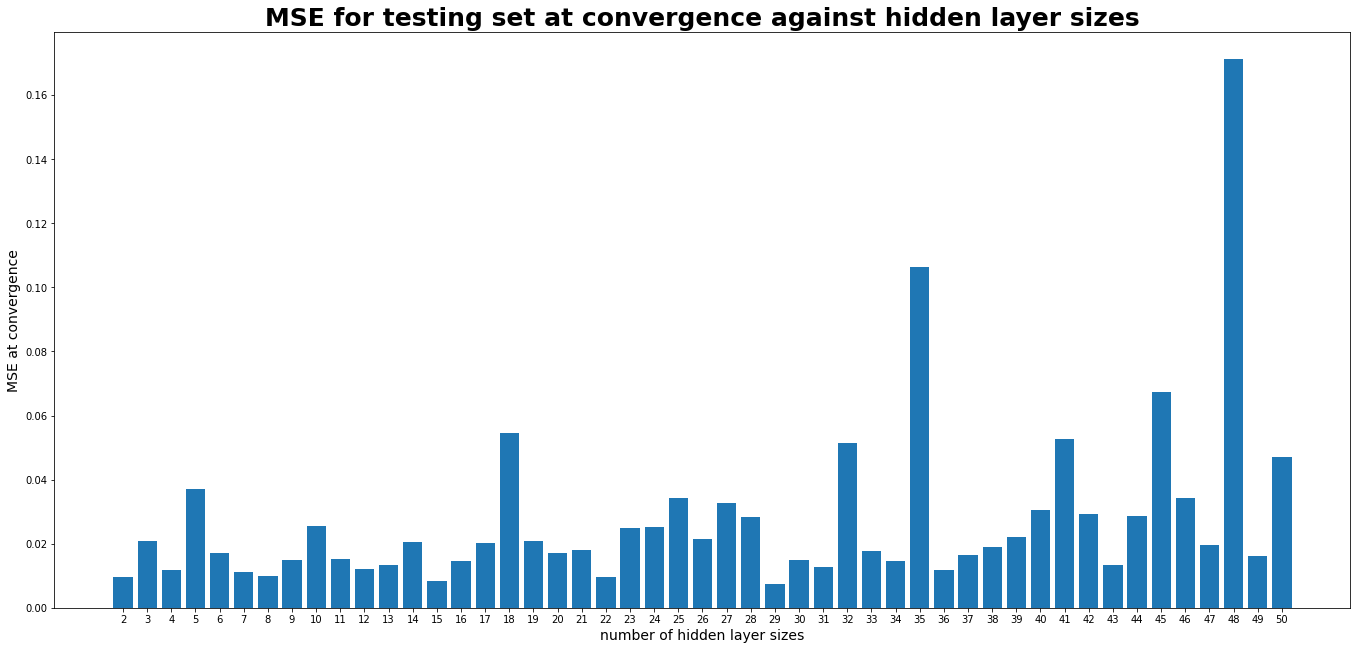

In [43]:
## MSE at convergence for each hidden layer size from 2 to 50

fig_exp = plt.figure()
ax_exp = fig_exp.add_axes([0,0,3,2])
layer_sizes = list(MSE_layer_size.keys())
MSEs = list(MSE_layer_size.values())

bars = ax_exp.bar(layer_sizes,MSEs)
#ax_exp.bar_label(bars,label=MSEs)
ax_exp.set_xticks(np.arange(min(layer_sizes), max(layer_sizes)+1, 1.0))
ax_exp.set_title('MSE for testing set at convergence against hidden layer sizes', 
             fontweight ="bold",fontsize=25) 
ax_exp.set_xlabel('number of hidden layer sizes',fontsize=14)
ax_exp.set_ylabel('MSE at convergence',fontsize=14)
plt.show()
#print(layer_sizes)
#print(MSEs)

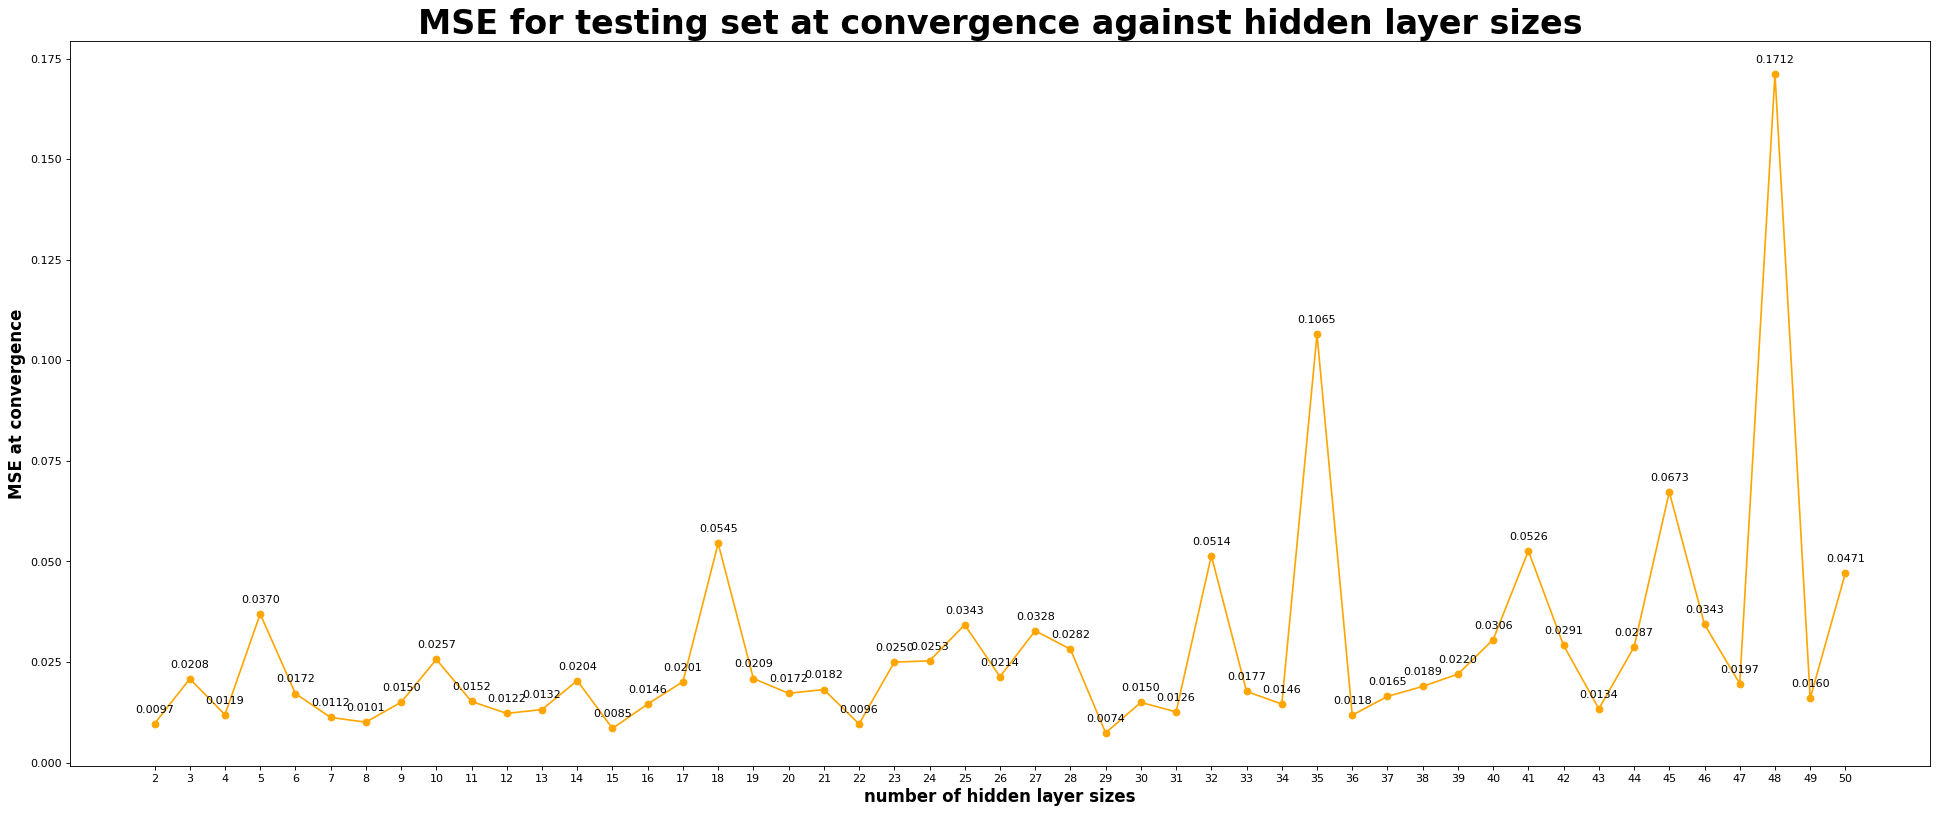

In [44]:
plt.figure(figsize=(30, 12), dpi=80)

plt.plot(layer_sizes, MSEs, 'o-',color='orange',label=MSEs)
for x,y in zip(layer_sizes,MSEs):

    label = "{:.4f}".format(y)

    plt.annotate(label, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center') 
plt.xlabel('number of hidden layer sizes',fontsize=15,fontweight ="bold")
plt.ylabel('MSE at convergence',fontsize=15,fontweight ="bold")
plt.xticks(np.arange(2,51), layer_sizes)
plt.title('MSE for testing set at convergence against hidden layer sizes',fontweight ="bold",fontsize=30)
plt.show()


In [45]:
## using trainrms to experiment with early stopping

model_c = keras.Sequential()
model_c.add(layers.Dense(8, activation="tanh", input_shape=(2,))) #hidden layer1
model_c.add(layers.Dense(8, activation="tanh"))#hidden layer2
model_c.add(layers.Dense(1,activation="tanh"))#output layer
model_c.summary()

Model: "sequential_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_165 (Dense)           (None, 8)                 24        
                                                                 
 dense_166 (Dense)           (None, 8)                 72        
                                                                 
 dense_167 (Dense)           (None, 1)                 9         
                                                                 
Total params: 105
Trainable params: 105
Non-trainable params: 0
_________________________________________________________________


In [46]:
## create custom early stopping class with threshold of val_loss less than 0.002.

class EarlyStoppingCustomLoss(cb):
    def __init__(self, monitor='val_loss', value=0.002, verbose=0):
        super(cb, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current < self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping THR" % epoch)
            self.model.stop_training = True

In [47]:
## create early_stopping object

early_stopping = EarlyStoppingCustomLoss()

In [48]:
## training for 1000 epoches with early stopping

traingrms_c = keras.optimizers.RMSprop(learning_rate=0.01)
model_c.compile(optimizer = traingrms_c, loss = 'MSE')
history_c_with_early_stopping = model_c.fit(train_c,z_train_c,epochs=1000,batch_size=10,validation_split=0.2,callbacks=early_stopping)
test_score_with_early_stopping = model_c.fit(train_c,z_train_c,epochs=1000,batch_size=10,validation_data=(test_c,z_test_c),callbacks=early_stopping)

z_predicted_c_with_early_stopping = model_c.predict(test_c)
z_predicted_c_with_early_stopping = z_predicted_c_with_early_stopping.flatten()

Epoch 1/1000
8/8 [==============================] - 0s 12ms/step - loss: 0.2209 - val_loss: 0.1724
Epoch 2/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1793 - val_loss: 0.1547
Epoch 3/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.1449 - val_loss: 0.1239
Epoch 4/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1067 - val_loss: 0.1003
Epoch 5/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0848 - val_loss: 0.1414
Epoch 6/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0658 - val_loss: 0.0696
Epoch 7/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0490 - val_loss: 0.0604
Epoch 8/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0385 - val_loss: 0.0566
Epoch 9/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0252 - val_loss: 0.0359
Epoch 10/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0212 - val_loss: 0.0406
Epoch 11/1000
8/8 

Epoch 84/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0040 - val_loss: 0.0190
Epoch 85/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0040 - val_loss: 0.0084
Epoch 86/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0072 - val_loss: 0.0049
Epoch 87/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0028 - val_loss: 0.0124
Epoch 88/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0069 - val_loss: 0.0033
Epoch 89/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 0.0047
Epoch 90/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0076 - val_loss: 0.0084
Epoch 91/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0034 - val_loss: 0.0099
Epoch 92/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0042 - val_loss: 0.0040
Epoch 93/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0056 - val_loss: 0.0092
Epoch 94/1

In [49]:
## training for 1000 epoches without early stopping

history_c= model_c.fit(train_c,z_train_c,epochs=1000,batch_size=10,validation_data=(val_c,z_val_c))
z_predicted_c_without_early_stopping = model_c.predict(test_c)
z_predicted_c_without_early_stopping = z_predicted_c_without_early_stopping.flatten()

Epoch 1/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0037 - val_loss: 0.0037
Epoch 2/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0047 - val_loss: 0.0072
Epoch 3/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0028 - val_loss: 0.0024
Epoch 4/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0052 - val_loss: 0.0013
Epoch 5/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0031 - val_loss: 0.0108
Epoch 6/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0052 - val_loss: 0.0017
Epoch 7/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0063 - val_loss: 0.0073
Epoch 8/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 9/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0043 - val_loss: 0.0029
Epoch 10/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0037 - val_loss: 0.0081

10/10 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 83/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0086 - val_loss: 0.0020
Epoch 84/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.0164
Epoch 85/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0045 - val_loss: 0.0013
Epoch 86/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.0112
Epoch 87/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0049 - val_loss: 0.0021
Epoch 88/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0029 - val_loss: 0.0267
Epoch 89/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0039 - val_loss: 0.0053
Epoch 90/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0032 - val_loss: 0.0026
Epoch 91/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0034 - val_loss: 0.0057
Epoc

10/10 [==============================] - 0s 4ms/step - loss: 0.0027 - val_loss: 0.0029
Epoch 163/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0037 - val_loss: 0.0100
Epoch 164/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0042 - val_loss: 0.0059
Epoch 165/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0036 - val_loss: 0.0011
Epoch 166/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 0.0042
Epoch 167/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0032 - val_loss: 0.0015
Epoch 168/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0033 - val_loss: 0.0115
Epoch 169/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0038 - val_loss: 0.0014
Epoch 170/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 0.0019
Epoch 171/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0042 - val_loss: 0.

10/10 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.0071
Epoch 243/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0033 - val_loss: 0.0012
Epoch 244/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0038 - val_loss: 0.0024
Epoch 245/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0047 - val_loss: 0.0018
Epoch 246/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 247/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0030 - val_loss: 0.0041
Epoch 248/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.0029
Epoch 249/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0035 - val_loss: 0.0040
Epoch 250/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0031 - val_loss: 0.0026
Epoch 251/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0029 - val_loss: 0.

10/10 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.0047
Epoch 323/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 0.0058
Epoch 324/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0043 - val_loss: 0.0011
Epoch 325/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0032 - val_loss: 0.0028
Epoch 326/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.0079
Epoch 327/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0057 - val_loss: 0.0025
Epoch 328/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.0022
Epoch 329/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 0.0016
Epoch 330/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0037 - val_loss: 0.0019
Epoch 331/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0042 - val_loss: 0.

10/10 [==============================] - 0s 3ms/step - loss: 0.0031 - val_loss: 0.0024
Epoch 403/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0032
Epoch 404/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0033 - val_loss: 0.0014
Epoch 405/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0028 - val_loss: 0.0119
Epoch 406/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0030 - val_loss: 0.0021
Epoch 407/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 0.0084
Epoch 408/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0028 - val_loss: 0.0017
Epoch 409/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 0.0043
Epoch 410/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0038 - val_loss: 0.0023
Epoch 411/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 0.

10/10 [==============================] - 0s 3ms/step - loss: 0.0027 - val_loss: 0.0014
Epoch 483/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0028 - val_loss: 0.0034
Epoch 484/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0042 - val_loss: 0.0018
Epoch 485/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0058
Epoch 486/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0037 - val_loss: 0.0015
Epoch 487/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0037 - val_loss: 0.0019
Epoch 488/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 0.0031
Epoch 489/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 0.0047
Epoch 490/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 0.0070
Epoch 491/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0030 - val_loss: 0.

10/10 [==============================] - 0s 3ms/step - loss: 0.0036 - val_loss: 0.0040
Epoch 563/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0022 - val_loss: 0.0085
Epoch 564/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.0024
Epoch 565/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 0.0029
Epoch 566/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0044 - val_loss: 0.0021
Epoch 567/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0039
Epoch 568/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0029 - val_loss: 0.0019
Epoch 569/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.0024
Epoch 570/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 0.0033
Epoch 571/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0033 - val_loss: 0.

10/10 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 0.0030
Epoch 643/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 0.0021
Epoch 644/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0034 - val_loss: 0.0054
Epoch 645/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0020
Epoch 646/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0035 - val_loss: 0.0015
Epoch 647/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 648/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0034 - val_loss: 0.0116
Epoch 649/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 650/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.0028
Epoch 651/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0036 - val_loss: 0.

10/10 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.0011
Epoch 723/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0046 - val_loss: 0.0016
Epoch 724/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0024
Epoch 725/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.0019
Epoch 726/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 0.0066
Epoch 727/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.0024
Epoch 728/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0036 - val_loss: 0.0124
Epoch 729/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0027 - val_loss: 0.0034
Epoch 730/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0035 - val_loss: 0.0108
Epoch 731/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 9.

10/10 [==============================] - 0s 3ms/step - loss: 0.0048 - val_loss: 0.0016
Epoch 803/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.0053
Epoch 804/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 805/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0030 - val_loss: 0.0025
Epoch 806/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0030 - val_loss: 0.0016
Epoch 807/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.0010
Epoch 808/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0028 - val_loss: 0.0012
Epoch 809/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0027 - val_loss: 0.0031
Epoch 810/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 0.0031
Epoch 811/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.

10/10 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 883/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0035 - val_loss: 0.0011
Epoch 884/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 0.0052
Epoch 885/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 0.0014
Epoch 886/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0041 - val_loss: 0.0012
Epoch 887/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0020
Epoch 888/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0038 - val_loss: 0.0040
Epoch 889/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0024 - val_loss: 0.0016
Epoch 890/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 891/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - val_loss: 0.

10/10 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.0021
Epoch 963/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0027 - val_loss: 0.0052
Epoch 964/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.0049
Epoch 965/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0034 - val_loss: 0.0021
Epoch 966/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 967/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0037 - val_loss: 0.0013
Epoch 968/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 969/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 0.0022
Epoch 970/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 0.0019
Epoch 971/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.

Text(0.5, 1.0, 'with early stopping')

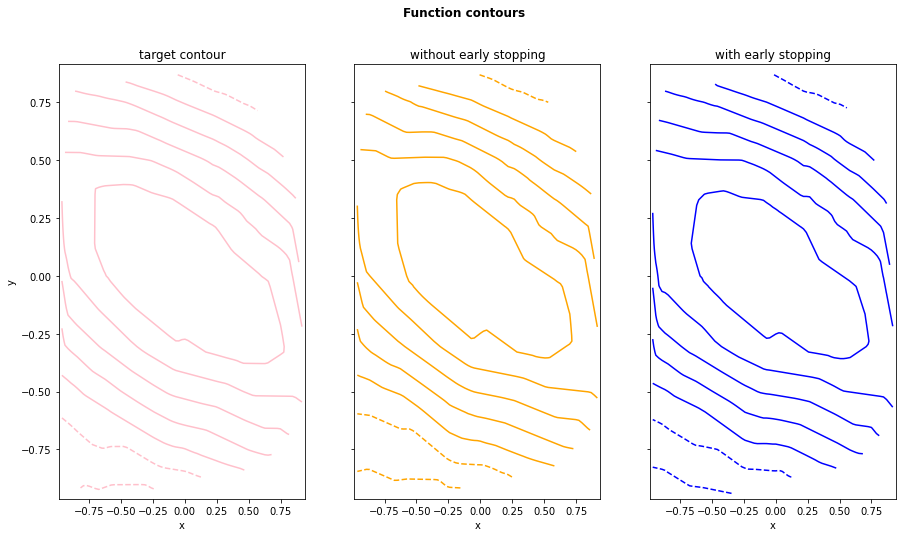

In [50]:
## function contour with and without early stopping

grid_x_c, grid_y_c = np.mgrid[min(x_test_c):max(x_test_c):81j, min(y_test_c):max(y_test_c):81j]
fig_c, (ax_c,ax_without_earlystopping,ax_with_earlystopping) = plt.subplots(1,3,figsize=(15, 8), sharex=True, sharey=True)
Z_c = interpolate.griddata((x_test_c,y_test_c), z_test_c, (grid_x_c, grid_y_c), method='linear')
Z_experiment_early_stop = interpolate.griddata((x_test_c,y_test_c), z_predicted_c_with_early_stopping, (grid_x_c, grid_y_c), method='linear')
Z_experiment = interpolate.griddata((x_test_c,y_test_c), z_predicted_c_without_early_stopping, (grid_x_c, grid_y_c), method='linear')
contour_c = ax_c.contour(grid_x_c, grid_y_c, Z_c,colors='pink')
contour_without = ax_without_earlystopping.contour(grid_x_c, grid_y_c, Z_experiment,colors='orange')
contour_with = ax_with_earlystopping.contour(grid_x_c, grid_y_c, Z_experiment_early_stop,colors='blue')
fig_c.suptitle('Function contours',fontweight ="bold")
ax_c.set_xlabel('x')
ax_c.set_ylabel('y')
ax_c.set_title('target contour')
ax_without_earlystopping.set_xlabel('x')
ax_without_earlystopping.set_title('without early stopping')
ax_with_earlystopping.set_xlabel('x')
ax_with_earlystopping.set_title('with early stopping')



[[0.0050458707846701145, 0.005214077420532703, 0.005267966538667679], [0.014742016792297363, 0.002756675472483039, 0.0019248053431510925], [0.01077042892575264, 0.0015068261418491602, 0.0015068261418491602], [0.002, 0.002, 0.002]]


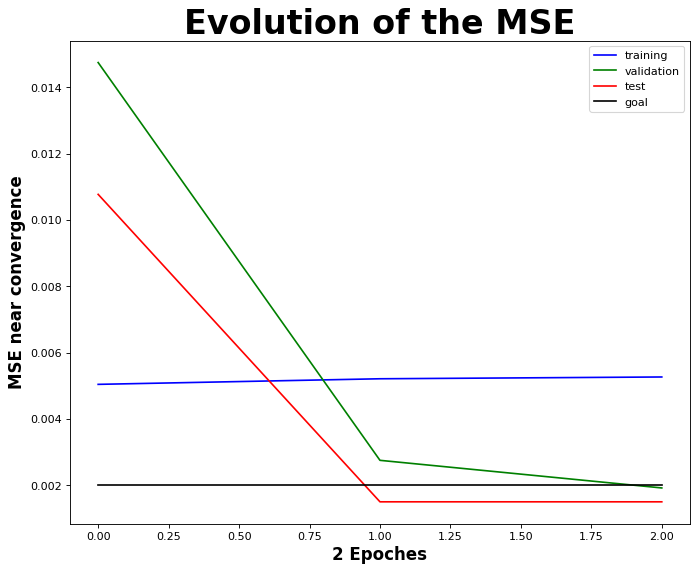

In [51]:
##evolution of MSE for 2 epoches near convergence.

#history_c_with_early_stopping
#test_score_with_earl_stopping
#target - 0.002
plt.figure(figsize=(10, 8), dpi=80)
epoches = [0,1,2]
target = [0.002,0.002,0.002]
test = []
training = []
validation = []


if(len(history_c_with_early_stopping.history['loss'])<3):
    training = history_c_with_early_stopping.history['loss']+([history_c_with_early_stopping.history['loss'][-1]]*(3-len(history_c_with_early_stopping.history['loss'])))
else:
    training = history_c_with_early_stopping.history['loss'][-3:]
    
if(len(history_c_with_early_stopping.history['val_loss'])<3):
    validation = history_c_with_early_stopping.history['val_loss']+([history_c_with_early_stopping.history['val_loss'][-1]]*(3-len(history_c_with_early_stopping.history['val_loss'])))
else:
    validation = history_c_with_early_stopping.history['val_loss'][-3:]
    
if(len(test_score_with_early_stopping.history['val_loss'])<3):
    test = test_score_with_early_stopping.history['val_loss']+([test_score_with_early_stopping.history['val_loss'][-1]]*(3-len(test_score_with_early_stopping.history['val_loss'])))
else:
    test = test_score_with_early_stopping.history['val_loss'][-3:]

MSE_near_convergence = [training,validation,test,target]
print(MSE_near_convergence)


plt.plot(epoches, MSE_near_convergence[0], '-',color='blue',label='training')
plt.plot(epoches, MSE_near_convergence[1], '-',color='green',label='validation')
plt.plot(epoches, MSE_near_convergence[2], '-',color='red',label='test')
plt.plot(epoches, MSE_near_convergence[3], '-',color='black',label='goal')

plt.xlabel('2 Epoches',fontsize=15,fontweight ="bold")
plt.ylabel('MSE near convergence',fontsize=15,fontweight ="bold")
plt.title('Evolution of the MSE',fontweight ="bold",fontsize=30)
plt.legend()
plt.show()
